# DSE5 Data Analytic

# กระบวนการทำ Data Analytic
0. จุดประสงค์ของการทำ Data Analytic คืออะไร
1. การเก็บข้อมูล/รวบรวมข้อมูลดิบ *
2. การตั้งคำถาม ตั้งสมมติฐาน 
3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
  - การเลือกข้อมูล
  - การจัดรูปแบบข้อมูล
  - การ clean ข้อมูล
4. การหาคำตอบจากข้อมูล ซึ่งอาจจะได้จากขั้นตอนที่ 3 หรือหา insight เพิ่มเติม
5. ระหว่างการหาคำตอบ จะมีคำถามใหม่เกิดขึ้นมา จนอาจจะนำมาสู่กระบวนการย้อนกลับไปสู่ขั้นตอน 1 หรือ 2
6. การสรุปผล 
** 1 กับ 2 อาจจะสลับกัน บางครั้งเราก็ตั้งคำถามก่อนรวมรวมข้อมูล


In [ ]:
# ให้เพื่อนๆ นักเรียน copy colab ก่อน

In [ ]:
%%capture
# Install libraries #โปรแกรมอื่นที่คนอื่นเขียนให้แล้ว เราแค่นำมาใช้
!pip install pygsheets #สำหรับทำงานกับ google sheet
!pip install pythainlp #สำหรับใช้งาน AI ด้านภาษา

In [ ]:
#download file จาก google drive
!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4
!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
!gdown --id 14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP

Downloading...
From: https://drive.google.com/uc?id=175HCEziwBcWBffjE9O50q4HivfB8DYE4
To: /content/botnoiw2v.py
100% 389/389 [00:00<00:00, 304kB/s]
Downloading...
From: https://drive.google.com/uc?id=1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
To: /content/botnoiw2v_small.mod
100% 19.0M/19.0M [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP
To: /content/TH-Sarabun-New.zip
100% 415k/415k [00:00<00:00, 59.9MB/s]


# การเก็บข้อมูล / รวบรวมข้อมูลดิบ

## Import Libraries

In [ ]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
import pygsheets #read googlesheet
import google.auth
from google.colab import auth

# โค้ดใช้ plot graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

# โค้ดจัดการตาราง
import pandas as pd
import numpy as np

# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

## Import Data

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1hLX-urBRjDwu-sUKU8YUMq6KNAgRUHp9PC31ZCta_Is/edit?usp=sharing'
sheet = gc.open_by_url(url)

#Get data from google sheet
df_trans = sheet.sheet1.get_as_df()
df_trans.head(10)

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ
0,7/17/2021 21:07:19,,21 - 30 ปี,Senior Geospatial Engineer,Merkator,สนใจ,Data Scientist/Data Engineer/Data Analytic,Python เบื้องต้น,Computer Vision รุ่นที่ 1,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่,ประยุกต์ใช้กับงาน,1,Bundle
1,7/17/2021 23:34:47,,21 - 30 ปี,ที่ปรึกษา,บ.อินฟราพลัส,สนใจ,Data Scientist/Data Engineer/Data Analytic,sql พิ้นฐาน,DataScienceEssential รุ่นที่ 2,สนใจตำแหน่งงาน data engineer,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,1,Bundle
2,7/17/2021 23:54:39,,31 - 40 ปี,พนักงานบริษัท,-,ไม่สนใจ,ไม่สนใจเข้าร่วมทำโปรเจคกลุ่ม,-,Computer Vision รุ่นที่ 1,เพิ่มเติมความรู้,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,1,Bundle
3,7/19/2021 13:08:55,,มากกว่า 40 ปี,พนักงานประจำ,มหาวิทยาลัยธุรกิจบัณฑิตย์,ไม่สนใจ,"Business, Data Scientist/Data Engineer/Data Analytic","Python, NodeJS",ไม่เคย,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,1,Bundle
4,7/20/2021 17:53:24,,31 - 40 ปี,Engineer,Berakas Power Company,สนใจ,"Project Manager, Business, Data Scientist/Data Engineer/Data Analytic",ไม่มีพื้นฐาน,ไม่เคย,อยากเปลี่ยนสายงาน,สามารถเป็น Data Engineer ได้,1,Bundle
5,7/20/2021 20:48:53,,21 - 30 ปี,ช่าง,airasia,สนใจ,Data Scientist/Data Engineer/Data Analytic,ไม่มีค่ะ,ไม่เคย,อยากหาความรู้ค่ะ,อยากหางานในสายนี้คะ,1,Bundle
6,7/21/2021 10:49:20,,31 - 40 ปี,โปรแกรมเมอร์,Appworks,สนใจ,Data Scientist/Data Engineer/Data Analytic,"java ,vb.net , c#.net",ไม่เคย,เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน,สามารถนำความรู้ไปใช้ในงานได้ดี,1,Bundle
7,7/21/2021 11:03:32,,31 - 40 ปี,Technical consultant,Logiciel consult and development,สนใจ,Data Scientist/Data Engineer/Data Analytic,C#,ไม่เคย,ต้องการเพิ่ม skill,มีความรู้ด้าน datasciene & data engineer,1,Bundle
8,7/21/2021 23:05:47,,21 - 30 ปี,free lands,utcc,สนใจ,Data Scientist/Data Engineer/Data Analytic,ไม่มี,ไม่เคย,อยากเก่ง,จะได้ไปใช้งาน,1,Bundle
9,7/22/2021 7:50:59,,31 - 40 ปี,ผู้สอบบัญชี,อาชีพอิสระ,สนใจ,"Business, Data Scientist/Data Engineer/Data Analytic",ไม่มี,ไม่เคย,ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต,ได้รับความรู้ความเข้าใจและปฏิบัติได้จริง,1,Bundle


In [ ]:
# แสดงข้อมูล .head เป็นการแสดงแค่ 5 บรรทัดแรก .head() .tail() .sample()
df_trans.tail()

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ
243,11/9/2021 10:46:56,Facebook group: Botnoi AI & Data science classroom,21-30 ปี,Project engineer,Omron electronic,สนใจ,Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API,"C#,vb.net",ไม่เคย,เปลี่ยนสายงาน,มีความรู้สายงานด้าน Data Science มากขึ้น,1,
244,11/9/2021 10:47:18,Page facebook : Botnoi Consulting,21-30 ปี,Data Scientist,Asia Risk Management Solutions Co. Ltd,สนใจ,Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้องการทำในเรื่องนั้นๆ,"Python, R, SQL, Fico, Java Script",ไม่เคย,Revising Machine Learning and doing to some projects,Get something,1,
245,11/9/2021 11:01:20,Facebook group: Botnoi AI & Data science classroom,21-30 ปี,ว่างงาน,-,สนใจ,"Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API, Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้อง...",python ประมาณ 2 ปี,ไม่เคย,อยากรู้เกี่ยวกับการใช้ data science ใน real world,สามารถนำความรู้มาใช้ใน real world ได้,1,
246,11/9/2021 11:26:51,เพื่อน,21-30 ปี,นักศึกษาปโท,Bounemouth U,ไม่สนใจ,ไม่สนใจร่วมทำกิจกรรม,ยังไม่มีพื้นฐาน,ไม่เคย,อยากมีพื้นฐานก่อนไปเรียนต่อปโททางด้านสายนี้,ได้รับความรู้ และนำไปใช้ได้จริงจนถึงต่อยอดได้,1,
247,11/9/2021 13:49:37,Line Botnoi,21-30 ปี,Data engineer,Mfec,สนใจ,Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้องการทำในเรื่องนั้นๆ,Sql python,ไม่เคย,อยากทำโปรเจคที่ใช้ได้จริง เพื่อให้เห็นภาพว่าเรานำความรู้มาใช้ได้ยังไง,ทำโปรเจคที่ใช้ได้จริงเป็นประโยชน์กับผู้อื่น,1,


In [ ]:
#เช็คชื่อของ column ใน dataframe
df_trans.columns

Index(['Timestamp', 'ได้รับข่าวสารจากช่องทางไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/สถานศึกษา',
       'คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่',
       'ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง) ',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียนคลาสนี้', 'ความคาดหวังจากการมาเรียนครั้งนี้',
       'ชำระค่าเรียน', 'หมายเหตุ'],
      dtype='object')

In [ ]:
#check row and columns of dataframes
df_trans.shape

(248, 13)

In [ ]:
#Check total data
len(df_trans)

248

In [ ]:
#check data types in dataframe
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Timestamp                                                                                            248 non-null    object
 1   ได้รับข่าวสารจากช่องทางไหน                                                                           248 non-null    object
 2   อายุ                                                                                                 248 non-null    object
 3   อาชีพ                                                                                                248 non-null    object
 4   สถานที่ทำงาน/สถานศึกษา                                                                               248 non-null   

In [ ]:
df_trans.isna().sum()

Timestamp                                                                                              0
ได้รับข่าวสารจากช่องทางไหน                                                                             0
อายุ                                                                                                   0
อาชีพ                                                                                                  0
สถานที่ทำงาน/สถานศึกษา                                                                                 0
คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่                                                      0
ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง)                                         0
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน    0
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา                                0
ทำไมถึงสนใจสมัครเรียนคลาสนี้                           

In [ ]:
#Show all column name of dataframe

df_trans.columns

Index(['Timestamp', 'ได้รับข่าวสารจากช่องทางไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/สถานศึกษา',
       'คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่',
       'ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง) ',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียนคลาสนี้', 'ความคาดหวังจากการมาเรียนครั้งนี้',
       'ชำระค่าเรียน', 'หมายเหตุ'],
      dtype='object')

In [ ]:
#ลอง fillter เฉพาะคอลัมท์และส่วนที่เราสนใจ
df = df_trans[df_trans['อายุ']== 'มากกว่า 40 ปี']
df.head()

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ
3,7/19/2021 13:08:55,,มากกว่า 40 ปี,พนักงานประจำ,มหาวิทยาลัยธุรกิจบัณฑิตย์,ไม่สนใจ,"Business, Data Scientist/Data Engineer/Data Analytic","Python, NodeJS",ไม่เคย,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,1,Bundle
10,7/22/2021 13:09:02,,มากกว่า 40 ปี,พนักงานบริษัท,DTGO Corporation Limited,ไม่สนใจ,ไม่สนใจเข้าร่วมทำโปรเจคกลุ่ม,"PHP, JavaScript, SQL",ไม่เคย,นำความรู้มาใช้งานกับ Data Projects ต่างๆ ขององค์กร,เข้าใจการทำ Data Pipeline และ Data Analytics แบบ Practical แบบที่สามารถเอาไปใช้งานได้จริง,1,Bundle
20,7/24/2021 13:58:59,,มากกว่า 40 ปี,System Analyst,Bank of Ayudhya Public Company Limited,สนใจ,"Developer, Data Scientist/Data Engineer/Data Analytic","Java, Golang, SQL",ไม่เคย,ศึกษาความรู้เพิ่มเติมให้ทันต่อยุคสมัย,ได้รับความรู้ความเข้าใจในการนำ data ที่มีมาใช้ให้เกิดประโยชน์สูงสุด,1,Bundle
35,7/28/2021 0:08:01,,มากกว่า 40 ปี,รับจ้าง,NA,สนใจ,"Project Manager, Developer, Data Scientist/Data Engineer/Data Analytic","Python (3 Years), PHP (2 Years)",ไม่เคย,เพราะอยากนำความรู้ที่ได้ไปต่อยอด หรือเปลี่ยนสายงาน,ต้องมีความรู้มากพอที่จะประกอบอาชีพในสายงาน Data Engineer ได้,1,Bundle
39,7/28/2021 13:22:24,,มากกว่า 40 ปี,It,Sense Info Tech,สนใจ,Data Scientist/Data Engineer/Data Analytic,ไม่มีพื้นฐานการเขียนโปรเเกรม,ไม่เคย,อยากมีความรู้ ความเข้าใจสายงานนี้,เข้าใจ Process การทำงานตามกระบวนการในหลักสูตร,1,Bundle


# การตั้งคำถาม ตั้งสมมติฐาน

- 2.1 ตั้งคำถาม

  - เพื่อศึกษาประเภท / ความคาดหวัง ผู้เรียนและเตรียมตัวสำหรับคนสอน
  - เพื่อเตรียมสำหรับ การแบ่งกลุ่มทำโปรเจ็ค
- 2.2 ตั้งสมมติฐาน
  - สมมุติฐานเกี่ยวกับ ลักษณะ / ประเภทของผู้สมัคร
  - สมมุติฐานเกี่ยวกับ ความสนใจและคาดหวังของผู้สมัคร

# การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
- เพื่อการวิเคราะห์เราต้องมีการจัดข้อมูลให้เหมาะสมสำหรับการนำมาวิเคราะห์

## 3.1 ข้อมูลอายุ

In [ ]:
df_trans.head()

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ
0,7/17/2021 21:07:19,,21 - 30 ปี,Senior Geospatial Engineer,Merkator,สนใจ,Data Scientist/Data Engineer/Data Analytic,Python เบื้องต้น,Computer Vision รุ่นที่ 1,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่,ประยุกต์ใช้กับงาน,1,Bundle
1,7/17/2021 23:34:47,,21 - 30 ปี,ที่ปรึกษา,บ.อินฟราพลัส,สนใจ,Data Scientist/Data Engineer/Data Analytic,sql พิ้นฐาน,DataScienceEssential รุ่นที่ 2,สนใจตำแหน่งงาน data engineer,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,1,Bundle
2,7/17/2021 23:54:39,,31 - 40 ปี,พนักงานบริษัท,-,ไม่สนใจ,ไม่สนใจเข้าร่วมทำโปรเจคกลุ่ม,-,Computer Vision รุ่นที่ 1,เพิ่มเติมความรู้,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,1,Bundle
3,7/19/2021 13:08:55,,มากกว่า 40 ปี,พนักงานประจำ,มหาวิทยาลัยธุรกิจบัณฑิตย์,ไม่สนใจ,"Business, Data Scientist/Data Engineer/Data Analytic","Python, NodeJS",ไม่เคย,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,1,Bundle
4,7/20/2021 17:53:24,,31 - 40 ปี,Engineer,Berakas Power Company,สนใจ,"Project Manager, Business, Data Scientist/Data Engineer/Data Analytic",ไม่มีพื้นฐาน,ไม่เคย,อยากเปลี่ยนสายงาน,สามารถเป็น Data Engineer ได้,1,Bundle


In [ ]:
datage = df_trans[['อายุ']]  
datage.head(10) # แสดงค่า column อายุ จำนวน 5 บรรทัดแรก

,อายุ
0,21 - 30 ปี
1,21 - 30 ปี
2,31 - 40 ปี
3,มากกว่า 40 ปี
4,31 - 40 ปี
5,21 - 30 ปี
6,31 - 40 ปี
7,31 - 40 ปี
8,21 - 30 ปี
9,31 - 40 ปี


In [ ]:
datage['อายุ'].value_counts() # .value_counts แสดงจำนวนของแต่ละช่วงอายุ

21 - 30 ปี       72
21-30 ปี         54
31 - 40 ปี       40
31-40 ปี         26
มากกว่า 40 ปี    19
มากกว่า 40       19
15-20 ปี         13
15 - 20 ปี        4
น้อยกว่า 15       1
Name: อายุ, dtype: int64

In [ ]:
datage.value_counts()

อายุ         
21 - 30 ปี       72
21-30 ปี         54
31 - 40 ปี       40
31-40 ปี         26
มากกว่า 40 ปี    19
มากกว่า 40       19
15-20 ปี         13
15 - 20 ปี        4
น้อยกว่า 15       1
dtype: int64

In [ ]:
# ทำความสะอาดข้อมูล .replace เพื่อแทนเอาค่าเฉพาะตัวเลข
datage = datage.replace('น้อยกว่า 15','<15')
datage = datage.replace('15-20 ปี','21-30')
datage = datage.replace('15 - 20 ปี','15-20')
datage = datage.replace('21-30 ปี','21-30')
datage = datage.replace('21 - 30 ปี','21-30')
datage = datage.replace('31-40 ปี','31-40')
datage = datage.replace('31 - 40 ปี','31-40')
datage = datage.replace('มากกว่า 40 ปี','>40')
datage = datage.replace('มากกว่า 40','>40')
datage.head(10)

,อายุ
0,21-30
1,21-30
2,31-40
3,>40
4,31-40
5,21-30
6,31-40
7,31-40
8,21-30
9,31-40


In [ ]:
datage['อายุ'].value_counts() # แสดงค่า จำนวน ที่ได้

21-30    139
31-40     66
>40       38
15-20      4
<15        1
Name: อายุ, dtype: int64

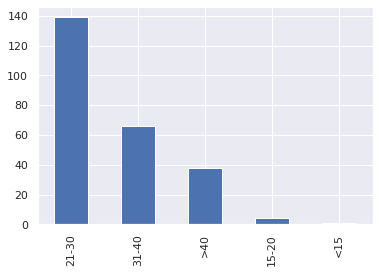

In [ ]:
# นำค่าอายุ มา plot กราฟ
datage['อายุ'].value_counts().plot.bar() # นำค่าอายุ มา plot กราฟ

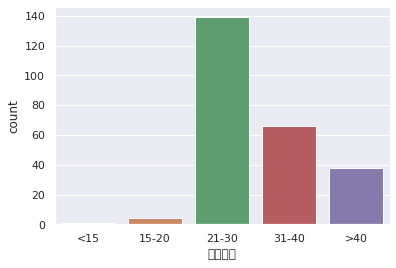

In [ ]:
sns.set(color_codes=True)
age_order = ['<15','15-20','21-30','31-40','>40']
ax = sns.countplot(x="อายุ", order = age_order,data=datage)

###สรุปเรื่องอายุ
- ถ้าตอนเก็บข้อมูลถามเป็นอายุ จะได้การวิเคราะห์ที่ดีกว่านี้ ตัดช่วงที่เป็น > ออกไป
- จำนวนของผู้สมัครมากที่สุดอยู่ในช่วง 21-30 ปี และ 31-40 ปี รองลงมา
- สมมติฐานที่เกิดขึ้นระหว่างการดูข้อมูลคือ กลุ่ม 21-30 ปี เป็นกลุ่มนักศึกษา 31-40 ปี เป็นพนักงานออฟฟิส 40 ปีขึ้นไปเป็นผู้บริหาร

In [ ]:
plt.rcParams["font.family"]='Tahoma'

In [ ]:
df_trans[df_trans['อายุ']=="21 - 30 ปี"][["อาชีพ"]].value_counts().head(10)

อาชีพ             
วิศวกร                6
พนักงานบริษัท         5
นักศึกษา              4
Programmer            3
พนักงานบริษัทเอกชน    3
แพทย์                 2
-                     2
พนักบริษัทเอกชน       1
Management Trainee    1
Sale                  1
dtype: int64

In [ ]:
df_trans[df_trans['อายุ']=="31 - 40 ปี"][["อาชีพ"]].value_counts().head(10)

อาชีพ                
พนักงานบริษัท            5
แพทย์                    2
ว่างงาน                  2
พนักงานบริษัทเอกชน       2
โปรแกรมเมอร์             1
Programer                1
Technical consultant     1
Support Engineer         1
Senior System Analyst    1
Presale Engineer         1
dtype: int64

In [ ]:
df_trans[df_trans['อายุ']=="มากกว่า 40 ปี"][["อาชีพ"]].value_counts().head(10)

อาชีพ             
พนักงานบริษัท         3
รับจ้าง               2
วิศวกร                1
พนักงานประจำ          1
พนักงานบริษัทเอกชน    1
นักบัญชีการเงิน       1
programmer            1
System Analyst        1
SAP Consultant        1
It                    1
dtype: int64

## 3.2 คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่

In [ ]:
df_trans.columns

Index(['Timestamp', 'ได้รับข่าวสารจากช่องทางไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/สถานศึกษา',
       'คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่',
       'ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง) ',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียนคลาสนี้', 'ความคาดหวังจากการมาเรียนครั้งนี้',
       'ชำระค่าเรียน', 'หมายเหตุ'],
      dtype='object')

In [ ]:
project = df_trans[['คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่']]
project.columns = ['project_answer']

project.head()

,project_answer
0,สนใจ
1,สนใจ
2,ไม่สนใจ
3,ไม่สนใจ
4,สนใจ


In [ ]:
# summary of project answer ==> yes = 80%
project['project_answer'].value_counts() 

สนใจ       198
ไม่สนใจ     50
Name: project_answer, dtype: int64

In [ ]:
# ทำการแปลงช่วงเวลา ให้เป็นตัวเลขทั้งหมด
position_in_team = df_trans[df_trans['คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่']=="สนใจ"][["ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง) "]]
position_in_team.columns = ['position_name']
position_in_team.head(10)

,position_name
0,Data Scientist/Data Engineer/Data Analytic
1,Data Scientist/Data Engineer/Data Analytic
4,"Project Manager, Business, Data Scientist/Data Engineer/Data Analytic"
5,Data Scientist/Data Engineer/Data Analytic
6,Data Scientist/Data Engineer/Data Analytic
7,Data Scientist/Data Engineer/Data Analytic
8,Data Scientist/Data Engineer/Data Analytic
9,"Business, Data Scientist/Data Engineer/Data Analytic"
11,Data Scientist/Data Engineer/Data Analytic
12,Data Scientist/Data Engineer/Data Analytic


In [ ]:
position_in_team['position_name'].value_counts() 

Data Scientist/Data Engineer/Data Analytic                                                                                                                                                     43
Developer, Data Scientist/Data Engineer/Data Analytic                                                                                                                                          22
Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API                                                                                                                                                    20
Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้องการทำในเรื่องนั้นๆ                                                                                                                          16
Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API, Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้องการทำในเรื่องนั้นๆ                                                                             13
Project Manager, Business, Dev

### สรุปจำนวนนักเรียนที่สนใจทำโปรเจคแบบทีมกับทางบอทน้อย
- มีคนสนใจเข้าร่วมทำโปรเจคแบบทีมกับบอทน้อยทั้งหมด xxx คน จากทั้งหมด xxx คน(xx%)
- ตำแหน่งที่ผู้เข้าร่วมสำใจทำมากสุด คือ Data Scientist, Data Analytic และ Data Engineer

In [ ]:
df_trans.columns

Index(['Timestamp', 'ได้รับข่าวสารจากช่องทางไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/สถานศึกษา',
       'คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่',
       'ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง) ',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียนคลาสนี้', 'ความคาดหวังจากการมาเรียนครั้งนี้',
       'ชำระค่าเรียน', 'หมายเหตุ'],
      dtype='object')

## 3.3 ข้อมูลความสามารถในการเขียนโปรแกรม

In [ ]:
# แสดงข้อมูลของพื้นฐานการเขียนโปรแกรม
pskill = df_trans[['มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน']]
pskill.columns = ['programming']      # กำหนดชื่อคอลัมน์ใหม่ เป็น programming
pskill.head()

,programming
0,Python เบื้องต้น
1,sql พิ้นฐาน
2,-
3,"Python, NodeJS"
4,ไม่มีพื้นฐาน


- ข้อมูลเป็น free text ไม่ใช่เป็นหัวข้อ ดังนั้นเราต้องทำให้ข้อมูลเป็นหัวข้อ category หรือตัวเลข numeric เพื่อใช้ในการวิเคราะห์
- อยากแยกกลุ่มคนที่เขียนโปรแกรมได้ กับไม่ได้
- อยากได้ข้อมูลของคนที่เขียน Python ได้ เพราะเป็นภาษาหลัก
- อยากได้ข้อมูลของคนที่เขียน R ได้ เพราะเป็นอีกภาษาที่แสดงถึงว่า น่าจะมีพื้นฐานการวิเคราะห์
- อยากได้ข้อมูลของคนที่เขียน Go ได้ เพราะน่าจะเป็น hardcore
- อยากจัดระดับความสามารถ
- สำหรับคนที่เขียนโปรแกรมได้ อยากจะแยกกลุ่มเป็น fullstack frontend backend โดยดูจากภาษาที่ใช้


In [ ]:
df_trans.shape

(248, 13)

In [ ]:
# หาคนที่ไม่มีพื้นฐานการเขียนโปรแกรม โดยใช้สมมติฐานว่า มีค่าว่า 'ไม่มี'
noprogrammingskill = pskill['programming'].str.contains('ไม่', na=False) # str.contains แสดงคำว่า ไม่ [result = boolean]
noprogrammingskill.sum() # .sum แสดงผลรวม

75

In [ ]:
# คนที่เหลือคือมีพื้นฐานในการเขียนโปรแกรม
programmingskill = ~noprogrammingskill
programmingskill.sum()

173

In [ ]:
# หาคนที่มีพื้นฐานการเขียน Python โดยใช้สมมติฐานว่า มีคำว่า python อยู่
pythonskill = pskill['programming'].str.lower().str.contains('python')  # str.lower แปลงค่าเป็นพิมพ์เล็ก และ str.contains แสดงคำว่า python
pythonskill.sum()

90

In [ ]:
# หาขนาดความยาวของอักษร "ทั้งประโยครวมภาษาไทย" จากสมมติฐานถ้าเขียนเยอะน่าจะมีความสามารถทางด้านโปรแกรมเยอะ
lenskill = pskill['programming'].str.len() # .str.len  เป็นการนับความยาวขนาดของ String 

In [ ]:
# ดูสมมติฐานเบื้องต้น แต่ผลลัพธ์ไม่ค่อยดี เพราะบางคนเขียนบรรยายเยอะ
plenskill = pskill.copy() # .copy เหมือนเป็นการ save as
plenskill['lenskill'] = lenskill # ใส่ค่าของ lenskill ใน column lenskill
plenskill = plenskill.sort_values(by='lenskill',ascending=False) # .sort_values แสดงค่าเรียงลำดับ ascending=False เรียงจากมากไปน้อย
plenskill.head()

,programming,lenskill
201,มีเรียนชชุดวิชาวิทยาการคำนวณและเทคโนโลยีสารสนเทศศาสตร์ของม.เกษตร ทำโปรเจคได้ใช้ arduino และเรียน...,118.0
57,ตอนปี 1 (เข้าเรียนปี 48) เรียน java เกรดห่วยแต่ก็ไม่ถึงกับติด F ปัจจุบัน ศึกษา Python ด้วยตัวเอง...,107.0
87,"เคยเขียน Pascal, Delphi, Java (J2EE,J2SE), PL/SQL แต่ไม่ได้ทำมาพักใหญ่ๆ แล้ว ปัจจุบันทำ ETL + SQL",97.0
136,"มีประสบการณ์เขียน C++ จากการอบรม สอวน. คอมพิวเตอร์ค่ายที่ 2, Lua, Python",72.0
76,มีพื้นฐานการเขียนภาษา php + mysql (ใช้ในการทำงานอยู่ในปัจจุบัน),63.0


In [ ]:
# หาขนาดความยาวของอักษร "เฉพาะที่เป็นภาษาอังกฤษ" สมมติฐาน ชื่อโปรแกรมน่าจะเขียนเป็นภาษาอังกฤษ
# .str.replace เพื่อเเทนที่เอา comma และ # ออก และ .str.extract เอาเฉพาะภาษาอังกฤษ
nplen = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().str.len()

npskill = pskill.copy()        # ให้ npskill = save as pskill
npskill['nskill'] = nplen      # ใส่ค่า nplen ใน column nskill (nplen เป็นค่าความยาว ที่เป็นอังกฤษ)
npskill = npskill.fillna(0)    # แปลงค่าทั้งหมดให้เป็นตัวเลข โดย fill ค่า 0 สำหรับ column npskill (สำหรับค่าที่ไม่ใช่ตัวเลขหรือที่เป็นภาษาไทย)
npskill.sort_values(by='nskill',ascending=False)       # .sort_values แสดงค่า column nskill โดยเรียงจากมากไปน้อย (ascending=False)

,programming,nskill
94,"python on Image Processing, NLP, Data Analytic,",44.0
207,"SQL , Fundamental of Python, HTML/CSS",31.0
31,"Python, SQL, HTML, CSS, Javascript, .Net",31.0
244,"Python, R, SQL, Fico, Java Script",29.0
60,"JavaScript, Java, SQL, Kotlin",26.0
155,PHP typescript javascript,25.0
219,"มี PHP, HTML, Web Application",25.0
150,"Python, pandas, Javascript",24.0
159,"Python, GoLang, php, C#, Java",24.0
224,"เคยเขียน bash shell script, perl มาบ้างครับ",24.0


In [ ]:
# ให้แสดงรายละเอียดโปรแกรมแบบ list ของทุกคนเรียงลงมา
# เอา comma และ # ออก สกัดเอาเฉพาะภาษาอังกฤษ แปลงเป็นพิมพ์ .value เพื่อแสดงค่า
plist = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().values
plist

array(['python ', 'sql ', nan, 'python nodejs', nan, nan, 'java vb', 'c',
       nan, nan, 'php javascript sql', 'sql python', nan, nan, 'python ',
       'python', nan, nan, nan, nan, 'java golang sql', nan, ' ', nan,
       nan, nan, nan, nan, nan, nan, nan,
       'python sql html css javascript ', ' ', ' python ',
       'r programming', 'python ', 'java python', ' python ', 'sql', nan,
       'python and sql beginner', 'sql ', nan, 'c', nan, ' r',
       'php python golang', ' sqlite ', nan, nan, 'python ', 'python c c',
       nan, 'c', 'python', ' python', 'java sql', ' ', ' java python',
       'vb', 'javascript java sql kotlin', 'c angular', 'python', nan,
       'vbc dcsplc', 'python ', 'java js', nan, nan, ' python ',
       'python basic ', nan, 'c', nan, 'basic', ' basic python basic sql',
       ' php ', 'sql', nan, 'python ', ' c vba ', 'c mssql oracle python',
       'htmlcss', 'python sql ', ' ', nan, 'c', ' pascal delphi java ',
       'sql', nan, 'excel powerbi', nan

In [ ]:
# เรียงข้อมูลใหม่ เงื่อนไขคือ เอา space ออก .strip และแยกเป็นคำๆ โดย .split(' ')
splist = []          # สร้าง list ใหม่ชื่อ splist
for p in plist:      # วน loop ทุกคำใน plist  เพื่อทำการเรียงข้อมูลตามเงื่อนไขที่สร้าง
  splist = splist + str(p).strip().split(' ')
splist

['python',
 'sql',
 'nan',
 'python',
 'nodejs',
 'nan',
 'nan',
 'java',
 'vb',
 'c',
 'nan',
 'nan',
 'php',
 'javascript',
 'sql',
 'sql',
 'python',
 'nan',
 'nan',
 'python',
 'python',
 'nan',
 'nan',
 'nan',
 'nan',
 'java',
 'golang',
 'sql',
 'nan',
 '',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'python',
 'sql',
 'html',
 'css',
 'javascript',
 '',
 'python',
 'r',
 'programming',
 'python',
 'java',
 'python',
 'python',
 'sql',
 'nan',
 'python',
 'and',
 'sql',
 'beginner',
 'sql',
 'nan',
 'c',
 'nan',
 'r',
 'php',
 'python',
 'golang',
 'sqlite',
 'nan',
 'nan',
 'python',
 'python',
 'c',
 'c',
 'nan',
 'c',
 'python',
 'python',
 'java',
 'sql',
 '',
 'java',
 'python',
 'vb',
 'javascript',
 'java',
 'sql',
 'kotlin',
 'c',
 'angular',
 'python',
 'nan',
 'vbc',
 'dcsplc',
 'python',
 'java',
 'js',
 'nan',
 'nan',
 'python',
 'python',
 'basic',
 'nan',
 'c',
 'nan',
 'basic',
 'basic',
 'python',
 'basic',
 'sql',
 'php',
 'sql',
 'nan',
 'py

In [ ]:
# Collections เป็นโมดูลเกี่ยวกับการเก็บข้อมูล Counter เพื่อนับจำนวน OrderDict เป็นการเรียงลำดับข้อมูล
from collections import Counter, OrderedDict
pdict=Counter(splist)
OrderedDict(pdict.most_common())
# pdict

OrderedDict([('nan', 80),
             ('python', 68),
             ('sql', 32),
             ('c', 31),
             ('', 23),
             ('java', 18),
             ('php', 10),
             ('r', 8),
             ('javascript', 7),
             ('html', 7),
             ('basic', 6),
             ('golang', 3),
             ('no', 3),
             ('script', 3),
             ('vb', 2),
             ('css', 2),
             ('js', 2),
             ('excel', 2),
             ('matlab', 2),
             ('shell', 2),
             ('linux', 2),
             ('nodejs', 1),
             ('programming', 1),
             ('and', 1),
             ('beginner', 1),
             ('sqlite', 1),
             ('kotlin', 1),
             ('angular', 1),
             ('vbc', 1),
             ('dcsplc', 1),
             ('vba', 1),
             ('mssql', 1),
             ('oracle', 1),
             ('htmlcss', 1),
             ('pascal', 1),
             ('delphi', 1),
             ('powerbi', 1),
 

In [ ]:
# ทำการจำแนกประเภทของคนที่เขียนโปรแกรมได้ โดยแบ่งออกเป็น 4 ประเภท
#Define skill set to divide group
frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
backendproglist = ['python','go','c','java']
dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
pythonproglist = ['python']

In [ ]:
plist

array(['python ', 'sql ', nan, 'python nodejs', nan, nan, 'java vb', 'c',
       nan, nan, 'php javascript sql', 'sql python', nan, nan, 'python ',
       'python', nan, nan, nan, nan, 'java golang sql', nan, ' ', nan,
       nan, nan, nan, nan, nan, nan, nan,
       'python sql html css javascript ', ' ', ' python ',
       'r programming', 'python ', 'java python', ' python ', 'sql', nan,
       'python and sql beginner', 'sql ', nan, 'c', nan, ' r',
       'php python golang', ' sqlite ', nan, nan, 'python ', 'python c c',
       nan, 'c', 'python', ' python', 'java sql', ' ', ' java python',
       'vb', 'javascript java sql kotlin', 'c angular', 'python', nan,
       'vbc dcsplc', 'python ', 'java js', nan, nan, ' python ',
       'python basic ', nan, 'c', nan, 'basic', ' basic python basic sql',
       ' php ', 'sql', nan, 'python ', ' c vba ', 'c mssql oracle python',
       'htmlcss', 'python sql ', ' ', nan, 'c', ' pascal delphi java ',
       'sql', nan, 'excel powerbi', nan

In [ ]:
# ลองดึงค่า ตัวอย่างของคนที่ 3 [2] ให้ spu เป็น ข้อมูลที่เป็นเซต แยกโดย .split(' ')
spu = set(plist[3].split(' '))
set(plist[3].split(' '))
spu

{'nodejs', 'python'}

In [ ]:
# นำข้อมูลที่ได้ มาหา intersect โดย .intersection
spu.intersection(pythonproglist) 

{'python'}

In [ ]:
# ลองหาความยาวของข้อมูลที่ intersect ได้
len(spu.intersection(pythonproglist))

1

In [ ]:
# สร้าง fuction ชื่อ getprogprofile เพื่อจำแนกประเภท ความสามารถของการเขียนโปรแกรมของแต่ละคน
def getprogprofile(plist):
  frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
  backendproglist = ['python','go','c','java']
  dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
  pythonproglist = ['python']
  pprofile = []
  for p in plist:                # วน loop ทุกคน
    spu = set(str(p).split(' '))
    fp = len(spu.intersection(frontendproglist))
    bp = len(spu.intersection(backendproglist))
    dp = len(spu.intersection(dataproglist))
    pp = len(spu.intersection(pythonproglist))
    pprofile.append([fp,bp,dp,pp])
  return pprofile

In [ ]:
#แสดงผลข้อมูลที่ได้จากการ intersection ออกมาเป็นตาราง
pprofile = getprogprofile(plist) #Return list of list [[a],[b]]
pprofile = pd.DataFrame(data=pprofile,columns=['frontend','backend','data','python'])  #pd.DataFrame เป็นคำสั่งใน Pandas เพื่อสร้างตาราง
pprofile.tail(10)
# pprofile

,frontend,backend,data,python
238,0,1,0,1
239,0,1,0,1
240,0,0,0,0
241,0,1,0,1
242,0,1,0,1
243,0,0,0,0
244,0,2,2,1
245,0,1,0,1
246,0,0,0,0
247,0,1,1,1


In [ ]:
df_trans.tail(15)

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ
233,10/29/2021 19:56:57,Facebook group: Botnoi AI & Data science classroom,21-30 ปี,นักศึกษา,ม.ธรรมศาสตร์,ไม่สนใจ,ไม่สนใจร่วมทำกิจกรรม,Python,DataScienceEssential รุ่นที่ 4,ต้องการได้ความรู้ที่นำไปใช้งานได้จริง,การนำความรู้ไปใช้ในชีวิตประจำวัน,,DSE4
234,11/3/2021 23:49:11,Facebook group: AI&ML Learners Thailand,21-30 ปี,ว่างงาน,-,สนใจ,Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API,มีพื้นฐาน ถนัดpython ประสบการณ์3ปี,ไม่เคย,สนใจในเนื้อหาที่สอน เพราะมีการสอนใช้MLในงานต่างๆ,เข้าใจMLพื้นฐานและสามารถนำมาประยุกต์ใช้กับโจทย์ต่างๆ,1,
235,11/6/2021 11:39:49,Line Botnoi,มากกว่า 40,Engineer,Schneider,สนใจ,"Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API, Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้อง...","Python,C++,VB,C#",AI Essential รุ่นที่ 1,Update knowledge,เรียนรู้คนรุ่นใหม่ๆ,1,
236,11/6/2021 20:39:57,Line Botnoi,15-20 ปี,นักเรียน,อัสสัมชัญธนบุรี,ไม่สนใจ,ไม่สนใจร่วมทำกิจกรรม,Python และ มีพื้นฐาน concept ของ ML,AI Essential รุ่นที่ 1,ชอบประโยคที่ว่า ข้อมูลก็เหมือนน้ำมัน บนโลกนี้มีข้อมูลมากมายสามารถค้นหาได้ ไม่ใช่เรื่องยาก แต่การ...,สามารถนำความรู้ด้านนี้มาปฏิบัติจริง,,ทุนมัธยม
237,11/7/2021 9:12:31,Line Group,15-20 ปี,นักเรียน,โรงเรียนสวนกุหลาบวิทยาลัย รังสิต,สนใจ,สาย Support เรื่องไหนช่วยได้ก็จะช่วยครับ,-,"ACE, AIE, Botnoi DSE Basic Python",อยากเข้าใจเกี่ยวกับสายงาน data sci เพราะผมยังไม่เเน่ใจว่าจะเข้าเรียนต่อมหาลัยที่ไหน (อาจจะเป็นเก...,อยากรู้ว่าสายงาน data sci ต้องทำอะไรบ้าง อย่างไร,,ทุนมัธยม
238,11/7/2021 13:15:30,Facebook group: Botnoi AI & Data science classroom,มากกว่า 40,นักวิจัย,คณะวิศวกรรมศาสตร์ มหาวิทยาลัยรามคำแหง,ไม่สนใจ,ไม่สนใจร่วมทำกิจกรรม,Python,DataScienceEssential รุ่นที่ 1,Update ข้อมูล AI,ทบทวนข้อมูล,,DSE1
239,11/7/2021 14:25:29,Facebook group: Botnoi AI & Data science classroom,21-30 ปี,วิศวกร,ม.พระนครเหนือ,สนใจ,Business คือผู้เชี่ยวชาญที่มีความรู้ฉพาะด้านที่ต้องการทำในเรื่องนั้นๆ,Python,DataScienceEssential รุ่นที่ 4,ต้องการสมัครงานเกี่ยวกับ Data Science,ได้รับประสบการณ์การทำงานเป็นทีม,,DSE4
240,11/7/2021 15:27:12,Facebook group: Botnoi AI & Data science classroom,น้อยกว่า 15,นักเรียน,ราชวินิตบางแก้ว,ไม่สนใจ,ไม่สนใจร่วมทำกิจกรรม,ไม่มี,ไม่เคย,อยากรู้จัก AI,หวังว่าจะรู้จักAIมากขึ้นค่ะ,,ทุนมัธยม
241,11/7/2021 18:18:32,Facebook group: Botnoi AI & Data science classroom,15-20 ปี,นักเรียน,โรงเรียนสิริรัตนาธร,สนใจ,Devoloper นักพัฒนาโปรแรกรม เช่นการสร้าง API,python,AI Chatbot Essential รุ่นที่ 1,ประทับใจในการสอนของBotnoi มาตั้งแต่ ACE และAIE สอนสนุกมากๆ และผมก็กำลังสนใจในเรื่องเกี่ยวกับA.Iห...,อยากเรียนรู้อยากเข้าใจDataScienceและนำไปประยุกต์ใช้ในกระบวนการคิดของผมให้เป็นขั้นเป็นตอน,,ทุนมัธยม
242,11/8/2021 17:37:04,Facebook group: Botnoi AI & Data science classroom,15-20 ปี,นักเรียน ม.5,อัสสัมชัญ,สนใจ,ได้ทุกตำแหน่งคับที่ช่วยได้ เช่น เสนอ idea,พื้นฐาน python,ไม่เคย,สนใจเรื่องการวิเคราะห์ข้อมูลเพื่อนำไปใช้ประโยชน์ในชีวิตประจำวันหรืออนาคตได้ รวมถึงการตัดสินใจบาง...,สามารถนำความรู้ที่ได้เรียนมา นำไปใช้ประโยน์ในการเวิคราะห์ข้อมูลและหา insight ข้อมูล และอาจจะช่วย...,,ทุนมัธยม


In [ ]:
# แบ่ง cluster ของกลุ่มความสามารถในการเขียนโปรแกรม ด้วย K-means
# skleran หรือ Scikit-learn เป็น library สำหรับ Machine Learning ในที่นี้ ใช้สำหรับการแบ่งกลุ่มแบบ KMeans
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=6, random_state=0).fit_predict(pprofile)    # กำหนดให้แบ่งออกเป็น 6 กลุ่ม และ random state เมื่อต้องการให้สุ่มได้ข้อมูลชุดเดิม
pprofile['prog_clus'] = clus
pprofile.head()

,frontend,backend,data,python,prog_clus
0,0,1,0,1,2
1,0,0,1,0,5
2,0,0,0,0,1
3,1,1,0,1,2
4,0,0,0,0,1


In [ ]:
#find total no. of each groups
pprofile["prog_clus"].value_counts()

1    119
2     54
4     21
0     21
5     17
3     16
Name: prog_clus, dtype: int64

In [ ]:
pprofile[pprofile["prog_clus"]==2]

,frontend,backend,data,python,prog_clus
0,0,1,0,1,2
3,1,1,0,1,2
14,0,1,0,1,2
15,0,1,0,1,2
33,0,1,0,1,2
35,0,1,0,1,2
36,0,2,0,1,2
37,0,1,0,1,2
46,1,1,0,1,2
50,0,1,0,1,2


In [ ]:
pprofile[pprofile["prog_clus"]==3]

,frontend,backend,data,python,prog_clus
10,2,0,1,0,3
31,3,1,1,1,3
61,1,1,0,0,3
66,1,1,0,0,3
76,1,0,0,0,3
82,1,0,0,0,3
100,1,0,0,0,3
144,1,0,1,0,3
155,2,0,0,0,3
171,2,0,0,0,3


In [ ]:
# ทำการแบ่งกลุ่มตาม cluster ต่าง ๆ โดยฟังชั่น .groupby ใช้ค่า mean
pprofile.groupby(by='prog_clus').mean()

,frontend,backend,data,python
prog_clus,,,,
0,0.142857,1.095238,1.047619,0.619048
1,0.000000,0.000000,0.000000,0.000000
2,0.129630,1.222222,0.000000,1.000000
3,1.437500,0.250000,0.187500,0.062500
4,0.000000,1.047619,0.000000,0.000000
5,0.000000,0.000000,1.058824,0.000000


In [ ]:
# นำมาวิเคราห์ต่อโดยการ กำหนดเป็นประเภทต่าง ๆ  แทนที่ชื่อกลุ่ม ตามประเภทที่คาดการณ์ไว้
pprofile['prog_clus'] = pprofile['prog_clus'].replace(0,'p_fullstack')#all skills
pprofile['prog_clus'] = pprofile['prog_clus'].replace(1,'p_noskill')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(2,'p_python')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(3,'p_frontend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(4,'p_backend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(5,'p_data')
pprofile.head(10)

,frontend,backend,data,python,prog_clus
0,0,1,0,1,p_python
1,0,0,1,0,p_data
2,0,0,0,0,p_noskill
3,1,1,0,1,p_python
4,0,0,0,0,p_noskill
5,0,0,0,0,p_noskill
6,0,1,0,0,p_backend
7,0,1,0,0,p_backend
8,0,0,0,0,p_noskill
9,0,0,0,0,p_noskill


In [ ]:
df_trans.shape

(248, 13)

In [ ]:
# แสดงค่าออกมาในรูปจำนวน ในแต่ละ skill
pprofile['prog_clus'].value_counts() #python = 35% of total students

p_noskill      119
p_python        54
p_fullstack     21
p_backend       21
p_data          17
p_frontend      16
Name: prog_clus, dtype: int64

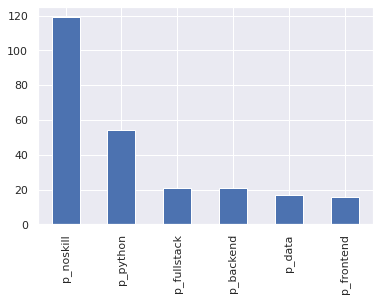

In [ ]:
pprofile['prog_clus'].value_counts().plot.bar()

###สรุปเรื่อง programming
- มีกลุ่มคนที่มีพื้นฐานการเขียน python มีจำนวนใกล้เคียงกับจำนวนคนที่ไม่มีพื้นฐานการเขียนโปนแกรม
- น่าพอจะสรุปได้ว่า python เป็นภาษายอดนิยมสำหรับคนที่สนใจ data science
- กลุ่มผู้สมัครบางส่วนอาจไม่ทราบว่าต้องใช้ python ในการวิเคราะห์ข้อมูล 


## 3.4 ความคาดหวังจากการเรียน



In [ ]:
# ดึงข้อมูลเกี่ยวกับความคาดหวังที่นักเรียนกรอกในแบบสอบถาม
expec = df_trans[['ความคาดหวังจากการมาเรียนครั้งนี้']]

In [ ]:
expec

,ความคาดหวังจากการมาเรียนครั้งนี้
0,ประยุกต์ใช้กับงาน
1,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer
2,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS
3,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต
4,สามารถเป็น Data Engineer ได้
5,อยากหางานในสายนี้คะ
6,สามารถนำความรู้ไปใช้ในงานได้ดี
7,มีความรู้ด้าน datasciene & data engineer
8,จะได้ไปใช้งาน
9,ได้รับความรู้ความเข้าใจและปฏิบัติได้จริง


In [ ]:
import botnoiw2v as bw
import numpy as np # numpy เป็น library ที่ใช้ในการคำนวนทางคณิตศาสตร์ใน Python สามารถจัดการกับอาเรย์หลายมิติและข้อมูลแบบเมทริกซ์
expecDat = np.vstack([bw.sentencevector(e) for e in expec['ความคาดหวังจากการมาเรียนครั้งนี้'].values])
expecDat

array([[-0.96477795,  0.11076228,  0.9556823 , ..., -1.1858922 ,
         0.5964667 , -1.5356284 ],
       [-1.1322716 , -0.05084785,  0.6639443 , ..., -0.3362212 ,
         0.19739534,  0.02025458],
       [-2.5748084 , -0.04154022,  1.2203797 , ..., -0.28060988,
        -0.15858616,  1.1597495 ],
       ...,
       [-2.036456  , -0.57362217,  0.17168267, ...,  0.06213878,
         0.5056918 ,  0.04658514],
       [-2.5737047 ,  0.6871239 ,  0.2885309 , ...,  0.60888684,
        -0.96005374, -0.1527222 ],
       [-1.473733  ,  0.09930176,  0.01314516, ...,  0.5886041 ,
        -1.569272  , -0.17590874]], dtype=float32)

In [ ]:
# ตัวอย่าง การหาค่าความคล้ายคลึงกันของประโยค
from sklearn.preprocessing import normalize 
vec1 = normalize([bw.sentencevector('วันนี้อากาศร้อนมาก')])[0]
vec2 = normalize([bw.sentencevector('ยังไม่ได้กินอะไรเลย')])[0]
vec3 = normalize([bw.sentencevector('อากาศไม่ค่อยดีเลย')])[0]

In [ ]:
# แบ่งกลุ่มความคาดหวังด้วย K-means
pd.set_option('display.max_colwidth', 100) # set ค่า max ของ column
eclus = KMeans(n_clusters=4, random_state=0).fit_predict(expecDat) # กำหนดให้แบ่งออกเป็น 4 กลุ่ม
expec['eclus'] = eclus # ใส่ค่าลงไปใน column eclus
expec

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
0,ประยุกต์ใช้กับงาน,3
1,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,3
2,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,2
3,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,2
4,สามารถเป็น Data Engineer ได้,3
5,อยากหางานในสายนี้คะ,0
6,สามารถนำความรู้ไปใช้ในงานได้ดี,2
7,มีความรู้ด้าน datasciene & data engineer,3
8,จะได้ไปใช้งาน,0
9,ได้รับความรู้ความเข้าใจและปฏิบัติได้จริง,2


In [ ]:
# แสดงข้อความใน cluster = 0 = apply groups
expec[expec['eclus']==0]

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
5,อยากหางานในสายนี้คะ,0
8,จะได้ไปใช้งาน,0
10,เข้าใจการทำ Data Pipeline และ Data Analytics แบบ Practical แบบที่สามารถเอาไปใช้งานได้จริง,0
11,สามารถนำความรู้ไปประยุกต์ใช้งานได้,0
12,สามารถต่อยอดจนทำงานสายนี้ได้,0
15,เน้นปฏิบัติ ใช้งานได้จริง มีเคสจริงให้ได้ลองทำ,0
17,สามารถนำความรู้ที่ได้ไปประยุกต์ใช้กับงานประจำได้,0
18,อยากนำความรู้ที่ได้มาประยุกต์ใช้กับการทำงานในอนาคต,0
21,ได้พื้นฐานที่แน่นหนาเพื่อเรียนต่อยอดต่อไป,0
25,นำไปเป็นแนวทางในการสมัครงานและทำงานในอนาคต,0


In [ ]:
# แสดงข้อความใน cluster = 1 = other groups
expec[expec['eclus']==1]

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
66,-,1
128,-,1


In [ ]:
# แสดงข้อความใน cluster = 2 = experience groups
expec[expec['eclus']==2]

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
2,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,2
3,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,2
6,สามารถนำความรู้ไปใช้ในงานได้ดี,2
9,ได้รับความรู้ความเข้าใจและปฏิบัติได้จริง,2
13,ต้องการความรู้และสกิลพื้นฐานที่สามารถต่อยอดในการทำงานได้ในอนาคต,2
14,สามารถนำ tool ต่างๆ ไปใช้ให้ทำงานได้รวดเร็วมากขึ้น,2
16,เปลี่ยนสายงานและ relocation​,2
20,ได้รับความรู้ความเข้าใจในการนำ data ที่มีมาใช้ให้เกิดประโยชน์สูงสุด,2
23,เข้าใจทักษะและการทำงานในสายงานด้าน Data มากขึ้น และสามารถใช้ความรู้ที่เรียนไปใช้ในการสมัครงาน ใช...,2
24,สามารถนำความรู้ไปประกอบอาชีพและเรียนต่อได้,2


In [ ]:
# แสดงข้อความใน cluster = 3 = concept groups
expec[expec['eclus']==3]

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
0,ประยุกต์ใช้กับงาน,3
1,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,3
4,สามารถเป็น Data Engineer ได้,3
7,มีความรู้ด้าน datasciene & data engineer,3
19,สามารถย้ายสายงานทำด้าน data ได้,3
22,ผมก็หวังว่าจะได้รับความรู้เกี่ยวกับ DE กับ DSE มากยิ่งขึ้น ได้รู้จักใช้งาน tools หรือโปรเเกรมต่า...,3
26,มีความรู้ด้าน data ระดับที่สามารถวิเคราะห์ข้อมูลต่างๆ เพื่อนำเสนอ/แนะนำลูกค้า หรือนำเสนอ/ให้ความ...,3
32,มีความรู้พื้นฐานเกี่ยวกับ Data และ mind set ที่ดี ถ้าต้องการเติบโตทางสาย Data นี้,3
33,เรียนรู้เรืิองการเขียนโปรแกรมและศึกษาสายงาน Data engineer,3
36,อยากย้ายสายงาน ไปทำ data sci,3


In [ ]:
#'expect_apply','expect_experience','expect_concept','expect_other'
expec['eclus'] = expec['eclus'].replace(0,'expect_apply')
expec['eclus'] = expec['eclus'].replace(1,'expect_other')
expec['eclus'] = expec['eclus'].replace(2,'expect_experience')
expec['eclus'] = expec['eclus'].replace(3,'expect_concept')
expec

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
0,ประยุกต์ใช้กับงาน,expect_concept
1,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,expect_concept
2,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,expect_experience
3,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,expect_experience
4,สามารถเป็น Data Engineer ได้,expect_concept
5,อยากหางานในสายนี้คะ,expect_apply
6,สามารถนำความรู้ไปใช้ในงานได้ดี,expect_experience
7,มีความรู้ด้าน datasciene & data engineer,expect_concept
8,จะได้ไปใช้งาน,expect_apply
9,ได้รับความรู้ความเข้าใจและปฏิบัติได้จริง,expect_experience


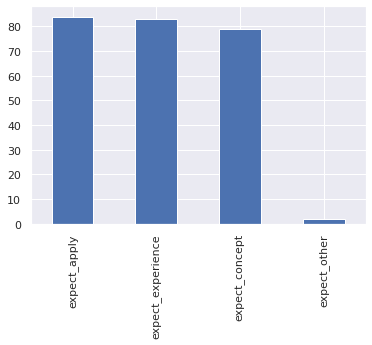

In [ ]:
# ทำการ plot กราฟ
expec['eclus'].value_counts().plot.bar()

###สรุปเรื่อง ความคาดหวัง
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่อยากได้ concept คาดว่าน่าจะเป็นบุคคลทั่วไปที่สนใจ อาจจะเป็นนักศึกษา หรือผู้บริหาร ที่อยากเข้าใจว่า data science คืออะไร
2.   กลุ่มที่ต้องการนำไปประยุกต์ใช้ในสายงาน คาดว่าน่าจะเป็น data analyst/scientist ที่อยากมีเรียนเพื่อให้มีความรู้มากขึ้น
3.   กลุ่มที่อยากประมีประสบการณ์น่าจะเป็นกลุ่ม programmer ที่ต้องการนำความรู้ไปประยุกต์ใช้ต่อ


In [ ]:
expec.head(1)

,ความคาดหวังจากการมาเรียนครั้งนี้,eclus
0,ประยุกต์ใช้กับงาน,expect_concept


In [ ]:
#One Hot example
expectdf = pd.get_dummies(expec['eclus'])
expectdf.tail(5)

,expect_apply,expect_concept,expect_experience,expect_other
243,0,1,0,0
244,0,1,0,0
245,0,1,0,0
246,0,0,1,0
247,1,0,0,0


In [ ]:
# แปลง cluster ให้เป็น One-hot
expectdf = pd.get_dummies(expec['eclus'])
expectdf.columns = ['expect_apply','expect_conecpt','expect_experience','expect_other']
expectdf.describe()

,expect_apply,expect_conecpt,expect_experience,expect_other
count,248.000000,248.000000,248.000000,248.000000
mean,0.338710,0.318548,0.334677,0.008065
std,0.474228,0.466856,0.472832,0.089621
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


## 3.5 เหตุผลที่มาสมัครเรียน

In [ ]:
studyreason = df_trans[['ทำไมถึงสนใจสมัครเรียนคลาสนี้']]
studyreason

,ทำไมถึงสนใจสมัครเรียนคลาสนี้
0,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่
1,สนใจตำแหน่งงาน data engineer
2,เพิ่มเติมความรู้
3,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer
4,อยากเปลี่ยนสายงาน
5,อยากหาความรู้ค่ะ
6,เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน
7,ต้องการเพิ่ม skill
8,อยากเก่ง
9,ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต


In [ ]:
# หาความคล้ายคลึงกันของประโยค
from sklearn.preprocessing import normalize
reasonDat = np.vstack([bw.sentencevector(s) for s in studyreason['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].values])
reasonDat

array([[ 0.37743217, -0.32476279,  0.11289268, ..., -0.66938406,
        -0.67390549, -1.34482706],
       [-0.51304436, -1.44084644, -0.77760506, ..., -0.10168119,
        -0.3037028 , -0.20656689],
       [-2.25497842,  2.42261219,  2.25082493, ..., -1.74978232,
        -0.70674598, -0.48411348],
       ...,
       [-1.63550961, -1.18663228,  0.45666292, ...,  0.27609321,
         0.02460122,  0.63639504],
       [-0.5590499 ,  0.57922018,  0.71821791, ..., -0.73547006,
        -0.47064281,  0.35690188],
       [-0.89292502,  0.64656776,  0.05485381, ...,  0.36383462,
        -0.21331954,  0.24047828]])

In [ ]:
# ทำการแบ่งกลุ่ม ออกเป็น 3 กลุ่ม
rclus = KMeans(n_clusters=3, random_state=0).fit_predict(reasonDat)
studyreason['rclus'] = rclus
studyreason

,ทำไมถึงสนใจสมัครเรียนคลาสนี้,rclus
0,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่,1
1,สนใจตำแหน่งงาน data engineer,0
2,เพิ่มเติมความรู้,2
3,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,1
4,อยากเปลี่ยนสายงาน,1
5,อยากหาความรู้ค่ะ,1
6,เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน,2
7,ต้องการเพิ่ม skill,0
8,อยากเก่ง,1
9,ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต,2


In [ ]:
studyreason[studyreason['rclus']==0]['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].values #reason_interested

array(['สนใจตำแหน่งงาน data engineer', 'ต้องการเพิ่ม skill',
       'อยากศึกษาการเป็น Data Engineer และ Data Scientist',
       'เพราะ Bundle', 'อยากเปลี่ยนสายมาทาง DE หรือ Data Analyst',
       'ส่วนตัวก็กำลังหาความรู้เพิ่มเกี่ยวกับ data เเล้วไปอ่านบทความของ Data TH เรื่องของ data engineer ทำให้มีความสนใจทางด้านนี้มากขึ้น บวกกับเจอคอร์ดเรียนขึ้นมาพอดี ก็เลยสนใจที่จะสมัครครับ',
       'เปลี่ยนสายอาชีพ', 'อยากเริ่มศึกษาด้านdataค่ะ',
       'ปัจจุบันทำงานเกี่ยวกับ Data visualization กับ Online Media Campaign ต่างๆ คิดว่าน่าจะสามารถนำความรู้จาก Data TH มาใช้ได้ทั้งปัจจุบันและอนาคต',
       'ต้องการ skill ด้าน data engineer',
       'อยากเปลี่ยนไปลองทำพวกสาย Data สาย Software ครับ',
       'อยากมีความรู้ความเข้าใจเกี่ยวกับ Data Science และ Machine Learning',
       'อยากทำงานด้าน data', 'เนื้อหาน่าสนใจ ดูครอบคลุม',
       'สนใจในสายงานด้าน Data Engineer แต่ไม่รู้ว่าควรเริ่มเรียนจากตรงไหน',
       'ต้องการเพิ่มความรู้ด้าน data science',
       'ต้องการเปลี่ยนสายงาน และเติมพื้นฐานให้ความชอบส

In [ ]:
studyreason[studyreason['rclus']==1]['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].values #reason_job

array(['อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่',
       'อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer',
       'อยากเปลี่ยนสายงาน', 'อยากหาความรู้ค่ะ', 'อยากเก่ง',
       'เอาไปใช้กับที่ทำงาน',
       'สงสัยการนำdata ที่มีไปใช้ประโยชน์อย่างไรได้บ้าง', 'เปลี่ยนสายงาน',
       'อยากพัฒนาตัวเองค่ะ', 'อยากเปลี่ยนสายงาน',
       'เพราะอยากนำความรู้ที่ได้ไปต่อยอด หรือเปลี่ยนสายงาน',
       'อยากมีความรู้ ความเข้าใจสายงานนี้',
       'อยากเปลี่ยนสายงานเป็น Data Engineer', 'อยากเปลี่ยนสายอาชีพ',
       'อยากเปลี่ยนสายงานครับ', 'อยากเปลี่ยนสายงาน', 'อยากเปลี่ยนสายงาน',
       'อยากรู้เรื่องเกี่ยวกับ DataEngineer', 'อยากเปลี่ยนสายงาน',
       'อยากหาวิธีทำงานให้ง่ายขึ้น', 'อยากเปลี่ยนสายงาน',
       'อยากลองเปลี่ยนสายงาน', 'อยากย้ายสายงาน',
       'อยากลองอะไรใหม่ๆโดยที่ผมเรียนสายวิศวคอมมาแล้วอยากเรียนรู้เพิ่มเติมจากมหาลัย และเอาความรู้ไปต่อยอดเพิ่มสกิลให้หลากหลายครับ',
       'อยากหาความรู้เพิ่ม', 'เปลี่ยนสายงาน', 'อยากเปลี่ยนสายงาน',
       'อยากเปลี่ยนสายงาน', 'เปลี่ยนสายงาน',

In [ ]:
studyreason[studyreason['rclus']==2]['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].values #reason_apply

array(['เพิ่มเติมความรู้', 'เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน',
       'ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต',
       'นำความรู้มาใช้งานกับ Data Projects ต่างๆ ขององค์กร',
       'เพิ่มความรู้สำหรับใช้ในงาน', 'น่าสนใจ',
       'ต้องการความรู้\u200bตั้งแต่พื้นฐาน\u200bโดยมีระบบ support',
       'อยากได้ความรู้เพิ่มเติม', 'อยากมีความรู้เพิ่มเติมในด้านนี้ค่ะ',
       'ศึกษาความรู้เพิ่มเติมให้ทันต่อยุคสมัย',
       'ต้องการทักษะด้าน data เพื่อใช้ในการเปลี่ยนสายงาน และใช้ความรู้กับการจัดการข้อมูลในรูปแบบต่างๆ',
       'อยากทำงานด้าน Data และเป็นพื้นฐานในการเรียนต่อ',
       'เพิ่มความรู้ ความสามารถ', 'เพิ่มทักษะ',
       'อยากศึกษาหาความรู้เกี่ยวกับการเป็น Data Engineer เพื่อพัฒนา Career Path ในอนาคต',
       'ชอบการตีความ และคาดการณ์จากข้อมูลโดยใช้คณิตศาสตร์ช่วย',
       'เพื่อนำไปใช้งาน', 'ต้องการศึกษาเพิ่มเติม', 'อยากเสริมความรู้',
       'อยากเรียนรู้เทคนิคต่างๆในด้าน Data Science และ Data Engineer',
       'อยากนำไปใช้พัฒ

In [ ]:
# เปลี่ยนชื่อกลุ่ม .replace
studyreason['rclus'] = studyreason['rclus'].replace(0,'reason_interested')
studyreason['rclus'] = studyreason['rclus'].replace(1,'reason_job')
studyreason['rclus'] = studyreason['rclus'].replace(2,'reason_apply')
studyreason

,ทำไมถึงสนใจสมัครเรียนคลาสนี้,rclus
0,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่,reason_job
1,สนใจตำแหน่งงาน data engineer,reason_interested
2,เพิ่มเติมความรู้,reason_apply
3,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,reason_job
4,อยากเปลี่ยนสายงาน,reason_job
5,อยากหาความรู้ค่ะ,reason_job
6,เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน,reason_apply
7,ต้องการเพิ่ม skill,reason_interested
8,อยากเก่ง,reason_job
9,ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต,reason_apply


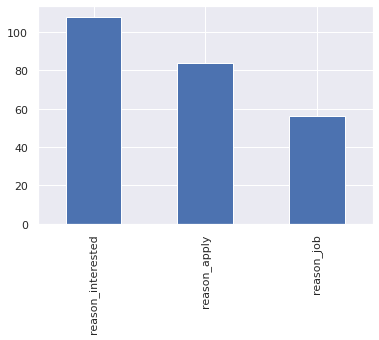

In [ ]:
# ทำการ plot กราฟ
studyreason['rclus'].value_counts().plot.bar()

###สรุปเรื่อง ความเหตุผลที่อยากเรียน
1. กลุ่มคนที่ต้องการนำความรู้ไปประยุกต์ใช้ในสายงานที่ทำอยู่
2. กลุ่มที่ต้องการเปลี่ยนสายงานมาทาง Data Science 
3. กลุ่มคนที่สนใจอยากหาความรู้เพิ่มเติม

## 3.6 สถานที่เรียน/ทำงาน

In [ ]:
# ติดตั้ง font ที่จะใช้ในการแสดงผลข้อความ
!unzip TH-Sarabun-New.zip

Archive:  TH-Sarabun-New.zip
replace THSarabunNew Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# Word Cloud การจับกลุ่มคำโดยเรียงจากคำที่มีมากสุดไปน้อยสุด เพื่อให้มองเห็นคำที่ถูกใช้มากที่สุดได้ง่ายขึ้น
from wordcloud import WordCloud
from collections import Counter

path = '/content/THSarabunNew.ttf'
textList = df_trans['สถานที่ทำงาน/สถานศึกษา'].values       # ทำ word cloud จาก สถานที่ทำงาน/เรียน
textList = [t.replace('\u200b','') for t in textList]
word_cloud_dict=Counter(textList)
word_cloud_dict
# textList

Counter({'-': 13,
         '24 Solution group': 1,
         '504LK Construction Co,Ltd.': 1,
         'AAPICO HITECH': 1,
         'AI LAB': 1,
         'AI Lab company., Ltd.': 1,
         'AIS': 1,
         'AP Thailand': 1,
         'Aecom Cost Consulting (Thailand)': 1,
         'Ai-Lab Company Limited': 1,
         'Airbus flight operations services ': 1,
         'Ais': 1,
         'Alstom': 1,
         'Appworks': 1,
         'Ascend': 1,
         'Asia Risk Management Solutions Co. Ltd': 1,
         'Asia Wealth Secuirities Co.,Ltd.': 1,
         'Asian Institute of Technology': 1,
         'B.Grimm Power Public Company Limited': 1,
         'BEM': 1,
         'BP Castrol': 1,
         'Bank of Ayudhya Public Company Limited': 1,
         'Berakas Power Company': 1,
         'Bounemouth U': 1,
         'CPF Trading / จุฬาลงกรณ์มหาวิทยาลัย': 1,
         'Changepoint': 1,
         'Chulalongkorn University': 1,
         'Classic Ausiris': 1,
         'DTGO Corporation Limited': 1

In [ ]:
# สร้าง funtion เพื่อสร้าง word cloud
def genwordcloud(word_cloud_dict,regexp):
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                        regexp=regexp,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        margin=2
                        ).generate_from_frequencies(word_cloud_dict)
  import pylab as plt      # plot graph
  fig, ax = plt.subplots(1, 1, figsize=(16, 12))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  fig.show()

In [ ]:
# สร้าง function เพื่อตัดบางคำออก
def remove_key(word_cloud_dict,keyList):
  wcd = word_cloud_dict.copy()
  kw = list(wcd.keys())
  for w in kw:
    for s in sList: 
      if (w.find(s)!=-1):
        try:
          wcd.pop(w)
        except:
          pass  
  return wcd

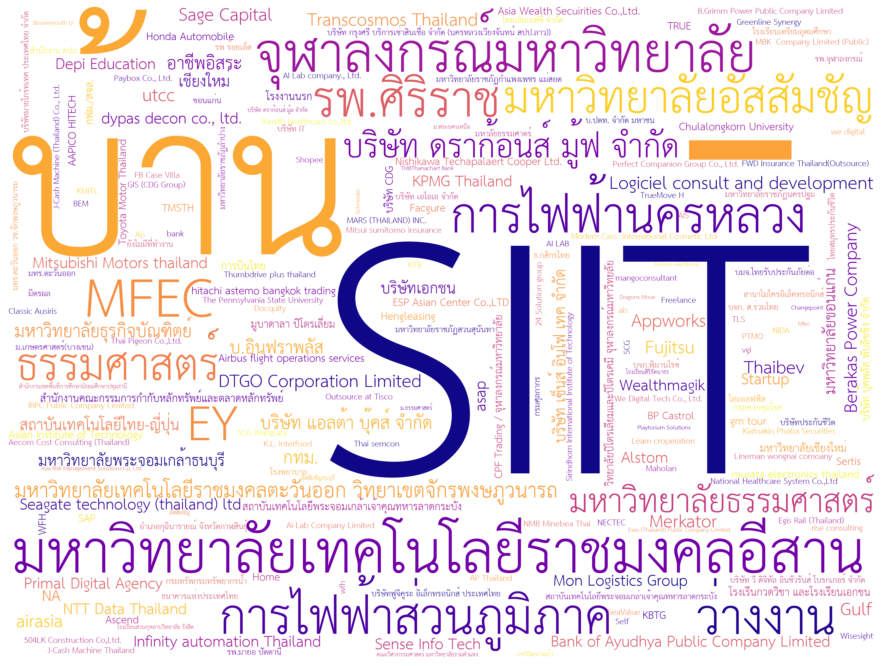

In [ ]:
regexp=r"\w[\w' ]+" #\w ==>[A-Za-z0-9_]
genwordcloud(word_cloud_dict,regexp)

In [ ]:
word_cloud_dict #Before removing word

Counter({'-': 13,
         '24 Solution group': 1,
         '504LK Construction Co,Ltd.': 1,
         'AAPICO HITECH': 1,
         'AI LAB': 1,
         'AI Lab company., Ltd.': 1,
         'AIS': 1,
         'AP Thailand': 1,
         'Aecom Cost Consulting (Thailand)': 1,
         'Ai-Lab Company Limited': 1,
         'Airbus flight operations services ': 1,
         'Ais': 1,
         'Alstom': 1,
         'Appworks': 1,
         'Ascend': 1,
         'Asia Risk Management Solutions Co. Ltd': 1,
         'Asia Wealth Secuirities Co.,Ltd.': 1,
         'Asian Institute of Technology': 1,
         'B.Grimm Power Public Company Limited': 1,
         'BEM': 1,
         'BP Castrol': 1,
         'Bank of Ayudhya Public Company Limited': 1,
         'Berakas Power Company': 1,
         'Bounemouth U': 1,
         'CPF Trading / จุฬาลงกรณ์มหาวิทยาลัย': 1,
         'Changepoint': 1,
         'Chulalongkorn University': 1,
         'Classic Ausiris': 1,
         'DTGO Corporation Limited': 1

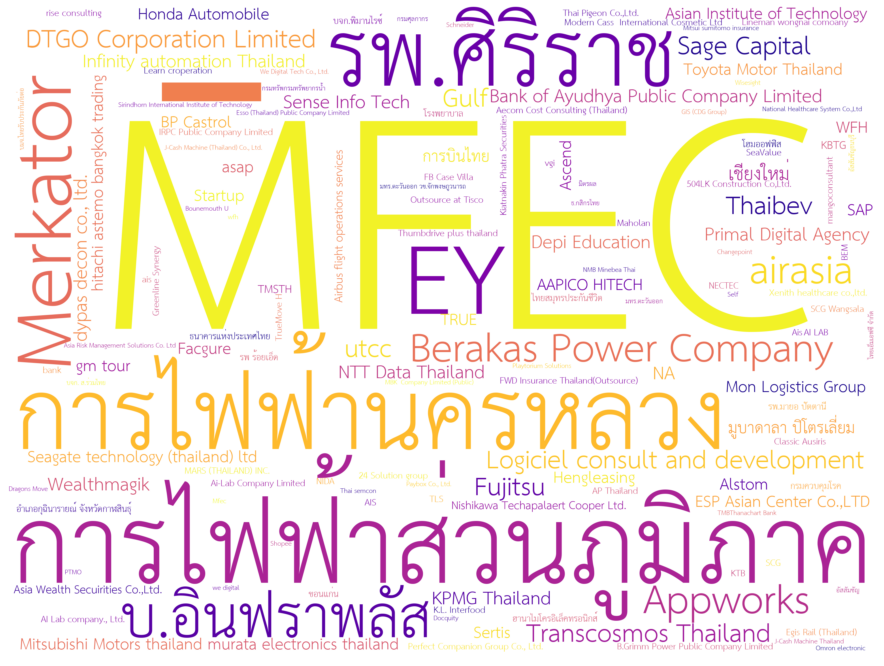

In [ ]:
# ตัดบางคำออกเพื่อจะได้แสดงเฉพาะ ที่เป็นสถานที่ทำงานจริง ๆ
sList = ['SIIT','มหิดล','KMITL','ชลบุรี','ม.','มหา','เกษตร','จุฬา','อารี','ศิลป','บาง','สุขุม','Free','คลอง','สจล','Rmu','กำลัง','Non','บอทน้อย','N/A','Botnoi','ไม่','บริษัท','สถาบัน','Uni','KMUTT','อิสระ','บ้าน','งาน','เรียน','FREE','Home','ธรรม','วิทยา']
wcd = remove_key(word_cloud_dict,sList)
regexp=r"\w[\w' ]+"
genwordcloud(wcd,regexp)
# wcd #after removing word

###สรุปเรื่อง สถานที่หน่วยงานที่มาเรียน
- แบ่งเป็น 2 กลุ่มหลัก
1. ประกอบธุรกิจส่วนตัว freelance หรืออาจเป็นนักศึกษาว่างงาน
2. บริษัทองค์กร ที่มีหลากหลายภาคธุรกิจ และมหาวิทยาลัยต่าง ๆ โดยเฉพาะ การไฟฟ้า โทรคมนาคม ธนาคาร

## 3.7 อาชีพของผู้สมัคร

In [ ]:
# list อาชีพ ของผู้ที่ผ่านการคัดเลือก
df_trans['อาชีพ']

0                        Senior Geospatial Engineer
1                                         ที่ปรึกษา
2                                     พนักงานบริษัท
3                                      พนักงานประจำ
4                                          Engineer
5                                              ช่าง
6                                      โปรแกรมเมอร์
7                              Technical consultant
8                                        free lands
9                                       ผู้สอบบัญชี
10                                    พนักงานบริษัท
11                                               BI
12                                    พนักงานบริษัท
13                                      CXD Manager
14                                    พนักงานบริษัท
15                                        developer
16                                managing director
17                                      วิศวกรไฟฟ้า
18                                                -
19          

In [ ]:
# หา vector ของแต่ละอาชีพ
import numpy as np
ovec = np.vstack([bw.sentencevector(d) for d in df_trans['อาชีพ'].values])
ovec

array([[-0.50586033, -1.29383957,  0.27607718, ...,  0.2930575 ,
         1.21879292,  0.71238887],
       [-2.42756462,  2.43567514,  0.39667645, ..., -1.44415045,
        -1.95565701, -1.18521047],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.02781113,  0.06200464, -0.37425184, ..., -0.67532945,
         0.32133913, -1.09901345],
       [ 0.71583605,  2.20067477,  1.67792857, ..., -1.47608483,
        -1.36672688, -0.7353425 ],
       [-0.14431843, -0.7429409 ,  0.24852896, ...,  0.18973863,
         0.60969716,  0.3422882 ]])

In [ ]:
# แบ่ง cluster ของกลุ่มอาชีพ ด้วย K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=10).fit(ovec)
ocClus = kmeans.predict(ovec)

In [ ]:
# create dataframe for occupation 0cluster analysis
occdat = df_trans[['อาชีพ']]
occdat['กลุ่มอาชีพ'] = ocClus

In [ ]:
occdat

,อาชีพ,กลุ่มอาชีพ
0,Senior Geospatial Engineer,5
1,ที่ปรึกษา,6
2,พนักงานบริษัท,0
3,พนักงานประจำ,0
4,Engineer,0
5,ช่าง,0
6,โปรแกรมเมอร์,0
7,Technical consultant,5
8,free lands,5
9,ผู้สอบบัญชี,0


In [ ]:
# display each occupation cluster
occdat[occdat['กลุ่มอาชีพ']==1].head(10)
#['it/data','en','co','ust','pm','st','te','none']

,อาชีพ,กลุ่มอาชีพ
22,นักศึกษา,1
29,นักศึกษา,1
55,นักศึกษา,1
69,นักศึกษา,1
73,นักศึกษา,1
75,นักศึกษา,1
106,นักศึกษา,1
148,นักศึกษา,1
156,นักศึกษา,1
164,นักศึกษา,1


In [ ]:
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(0,'other')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(1,'unistudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(2,'other')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(3,'company_emplyee')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(4,'student')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(5,'none')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(6,'professor')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(7,'tech')

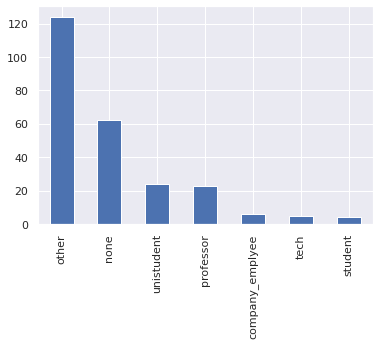

In [ ]:
occdat['กลุ่มอาชีพ'].value_counts().plot.bar()

###สรุปเรื่อง อาชีพ
- มีกลุ่มคนที่สนใจเรียนจากหลากหลายอาชีพ
- สาย tech น่าจะนำไปประยุกต์ใช้ในงาน
- นักศึกษาน่าจะสนใจที่จะมาทำงานทางด้าน Data Science

## รวมข้อมูลเพื่อสร้าง DataMart

In [ ]:
datage = datage.reset_index()         # ข้อมูลอายุ
pprofile = pprofile.reset_index()     # ข้อมูลความสามารถทางด้านโปรแกรม
expec = expec.reset_index()           # ข้อมูลความคาดหวังจากการเรียน
studyreason = studyreason.reset_index()  # ข้อมูลเหตุผลที่มาเรียน
occdat = occdat.reset_index()         # ข้อมูลอาชีพ

datamart = pd.concat([datage[['อายุ']],pprofile[['prog_clus']],expec[['eclus']],studyreason[['rclus']],occdat[['กลุ่มอาชีพ']]],axis=1)
datamart

,อายุ,prog_clus,eclus,rclus,กลุ่มอาชีพ
0,21-30,p_python,expect_concept,reason_job,none
1,21-30,p_data,expect_concept,reason_interested,professor
2,31-40,p_noskill,expect_experience,reason_apply,other
3,>40,p_python,expect_experience,reason_job,other
4,31-40,p_noskill,expect_concept,reason_job,other
5,21-30,p_noskill,expect_apply,reason_job,other
6,31-40,p_backend,expect_experience,reason_apply,other
7,31-40,p_backend,expect_concept,reason_interested,none
8,21-30,p_noskill,expect_apply,reason_job,none
9,31-40,p_noskill,expect_experience,reason_apply,other


# การหาคำตอบจากข้อมูล

## 4.1 ความคาดหวังของคนเรียน

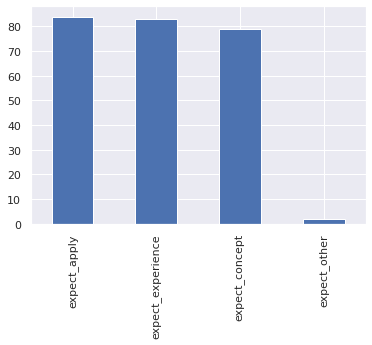

In [ ]:
datamart['eclus'].value_counts().plot.bar()

## 4.2 เหตุผลที่เรียน

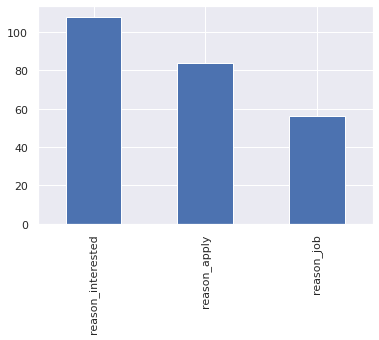

In [ ]:
datamart['rclus'].value_counts().plot.bar()

## 4.3 พื้นฐานเขียนโปรแกรม

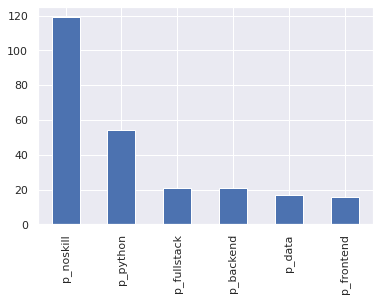

In [ ]:
datamart['prog_clus'].value_counts().plot.bar()

## 4.4 ช่วงอายุคนเรียน

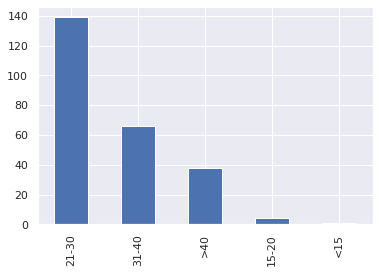

In [ ]:
datamart['อายุ'].value_counts().plot.bar()

## 4.5 อาชีพ

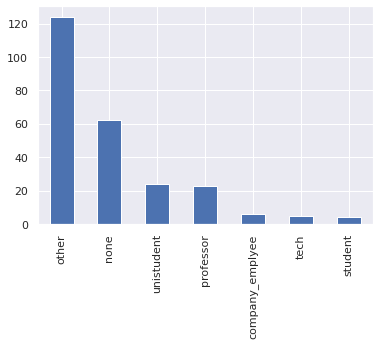

In [ ]:
datamart['กลุ่มอาชีพ'].value_counts().plot.bar()

##สรุป ความสำคัญของการสร้าง data mart
- หากข้อมูลเรามีการอัพเดท เราก็สามารถวิเคราะห์ข้อมูล เทรนใหม่ ได้อย่างรวดเร็ว
- สามารถไปสร้าง dashboard ที่เป็น real-time ก็ได้
- หัวใจของ data analytic อยู่ที่ data mart ทำได้ครบถ้วน แค่ไหน

# ชุดคำถามใหม่หลังจากเห็นผลลัพธ์แรก

In [ ]:
# ลองเอาข้อมูลมา cross tab คือเอาข้อมูลในส่วนที่ตรงกันมาเทียบในตารางเดียวกัน 
pd.crosstab(datamart['eclus'],datamart['prog_clus'])     # ในที่นี้ใช้ ความคาดหวัง กับ programming 

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,7,6,4,6,44,17
expect_concept,8,6,4,11,33,17
expect_experience,6,4,7,4,42,20
expect_other,0,1,1,0,0,0


In [ ]:
# pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=0).drop('expect_other') # ตัด expect_other ออก

In [ ]:
# pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=1).drop('expect_other')

In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'])

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
15-20,0,0,0,1,2,1
21-30,11,11,7,12,62,36
31-40,8,6,5,5,32,10
<15,0,0,0,0,1,0
>40,2,0,4,3,22,7


In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'],normalize=1)  # อายุ กับ programming

prog_clus,p_backend,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
15-20,0.000000,0.000000,0.0000,0.047619,0.016807,0.018519
21-30,0.523810,0.647059,0.4375,0.571429,0.521008,0.666667
31-40,0.380952,0.352941,0.3125,0.238095,0.268908,0.185185
<15,0.000000,0.000000,0.0000,0.000000,0.008403,0.000000
>40,0.095238,0.000000,0.2500,0.142857,0.184874,0.129630


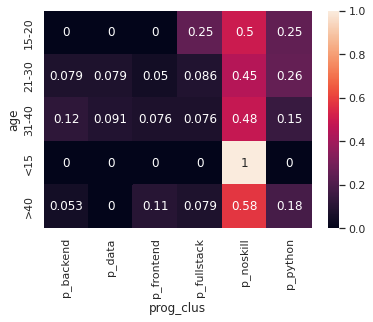

In [ ]:
# วิเคราะห์ระหว่าง อายุ กับ ความสามารถด้านโปรแกรม plot แบบ heat map
datamart['age'] = datamart['อายุ']
ageXprog = pd.crosstab(datamart['age'],datamart['prog_clus'],normalize=0)
ageXprog = ageXprog.T[['15-20','21-30','31-40','<15','>40']].T
sns.heatmap(ageXprog, annot=True)   # annot=True เป็นการเขียนค่าลงในช่อง Heatmap

###สรุปผล อายุเทียบกับความสามารถในการเขียนโปรแกรม
- อายุน้อยจะมีความสามารถในการเขียนโปรแกรมมาก ในที่นี้คือ python
- อายุมากกว่า 40 ปี ส่วนใหญ่จะไม่มีพื้นฐานทางโปรแกรม อาจเป็นระดับผู้บริหาร


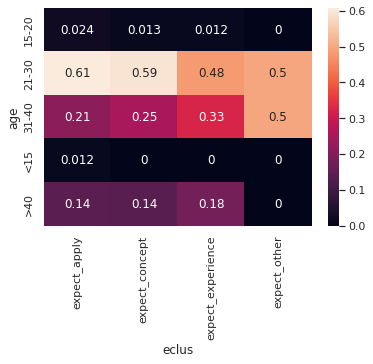

In [ ]:
# วิเคราะห์ระหว่าง อายุ กับ ความคาดหวังจากการเรียน plot แบบ heat map
pd.crosstab(datamart['กลุ่มอาชีพ'],datamart['prog_clus'],normalize=1)
ageXexpe = pd.crosstab(datamart['age'],datamart['eclus'],normalize=1)
ageXexpe = ageXexpe.T[['15-20','21-30','31-40','<15','>40']].T
sns.heatmap(ageXexpe, annot=True)

###สรุปผล อายุเทียบกับความคาดหวัง
- ช่วงอายุ 30-40 ปี จะเป็นกลุ่มวัยคนทำงานเป็นช่วงที่ต้องการเรียนรู้เพิ่มเติมเพื่อไปประยุกต์ใช้ต่อในสายงาน
- ยิ่งอายุน้อยยิ่งต้องการไอเดีย concept อยากมีความเข้าใจในสายงาน Data Science 


# การจัดกลุ่มนักเรียน

In [ ]:
datamart.columns = ['age','prog','expec','reason','occup','age']

In [ ]:
datamart = datamart[['age','prog','expec','reason','occup']]

In [ ]:
ddatamart = pd.get_dummies(datamart)

In [ ]:
studentclus = KMeans(n_clusters=20, random_state=0).fit_predict(ddatamart)
ddatamart['studentclus'] = studentclus
clusres = ddatamart.groupby('studentclus').mean().round(1)

In [ ]:
datamart.head()

,age,age,prog,expec,reason,occup
0,21-30,21-30,p_python,expect_concept,reason_job,none
1,21-30,21-30,p_data,expect_concept,reason_interested,professor
2,31-40,31-40,p_noskill,expect_experience,reason_apply,other
3,>40,>40,p_python,expect_experience,reason_job,other
4,31-40,31-40,p_noskill,expect_concept,reason_job,other


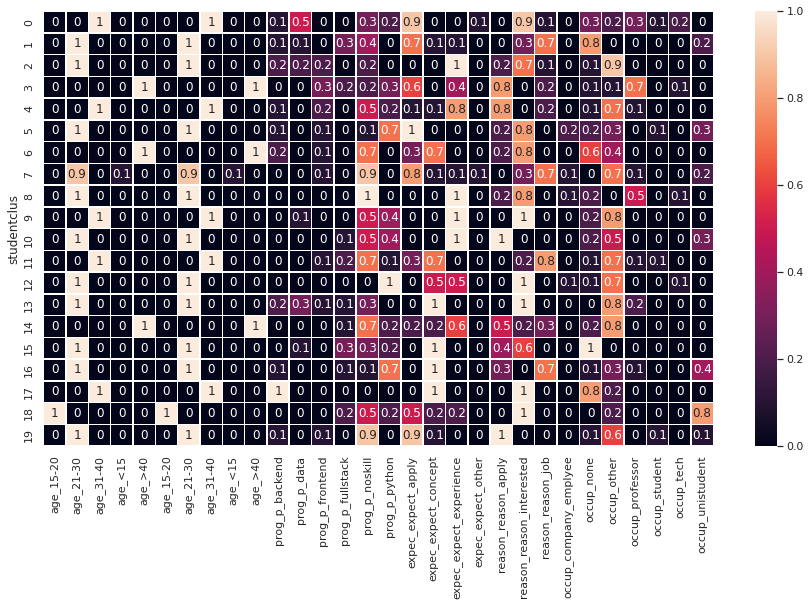

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(clusres, annot=True, linewidths=.5, ax=ax)
#sns.heatmap(clusres, annot=True)

# สรุป
- data analytic มีความสำคัญอย่างมากในการหา insight เพื่อตอบคำถามทางธุรกิจเบื้องต้น
- ข้อจำกัดของ data analytic คือ การโต้ตอบกับมนุษย์ที่มองเห็นได้มากที่สุดเพียง 3 มิติเท่านั้น 
- เราจะใช้ Machine Learning ในการเข้าใจ data ที่เหนือกว่า 3 มิติ รวมถึงการสร้าง AI เพิ่มทำนายผลทางธุรกิจ



---



# backup (วิเคราะห์เพิ่มเติม)

In [ ]:
datamart.head()

,age,age,prog,expec,reason,occup
0,21-30,21-30,p_python,expect_concept,reason_job,none
1,21-30,21-30,p_data,expect_concept,reason_interested,professor
2,31-40,31-40,p_noskill,expect_experience,reason_apply,other
3,>40,>40,p_python,expect_experience,reason_job,other
4,31-40,31-40,p_noskill,expect_concept,reason_job,other


In [ ]:
# Concatenate original dataframe with datamart เป็นข้อมูลที่แบ่งกลุ่มแล้ว
dat_reset = df_trans.reset_index().drop('index', axis=1)    
dat = pd.concat([dat_reset, datamart], axis=1)     # axis=1 เพิ่มข้อมูลทางแนว column
dat.head()

,Timestamp,ได้รับข่าวสารจากช่องทางไหน,อายุ,อาชีพ,สถานที่ทำงาน/สถานศึกษา,คุณสนใจเข้าร่วมทำโปรเจคแบบทีมกับทางบอทน้อยหรือไม่,ตำแหน่งที่คุณอยากทำในทีม (1 คนสามารถเลือกได้มากกว่า 1 ตำแหน่ง),มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียนคลาสนี้,ความคาดหวังจากการมาเรียนครั้งนี้,ชำระค่าเรียน,หมายเหตุ,age,age,prog,expec,reason,occup
0,7/17/2021 21:07:19,,21 - 30 ปี,Senior Geospatial Engineer,Merkator,สนใจ,Data Scientist/Data Engineer/Data Analytic,Python เบื้องต้น,Computer Vision รุ่นที่ 1,อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่,ประยุกต์ใช้กับงาน,1,Bundle,21-30,21-30,p_python,expect_concept,reason_job,none
1,7/17/2021 23:34:47,,21 - 30 ปี,ที่ปรึกษา,บ.อินฟราพลัส,สนใจ,Data Scientist/Data Engineer/Data Analytic,sql พิ้นฐาน,DataScienceEssential รุ่นที่ 2,สนใจตำแหน่งงาน data engineer,เข้าใจแนวทาง วิธีการปฏิบัติ ของงาน data engineer,1,Bundle,21-30,21-30,p_data,expect_concept,reason_interested,professor
2,7/17/2021 23:54:39,,31 - 40 ปี,พนักงานบริษัท,-,ไม่สนใจ,ไม่สนใจเข้าร่วมทำโปรเจคกลุ่ม,-,Computer Vision รุ่นที่ 1,เพิ่มเติมความรู้,อยากรู้พื้นฐาน และแนวทางการทำงานของDEและ DS,1,Bundle,31-40,31-40,p_noskill,expect_experience,reason_apply,other
3,7/19/2021 13:08:55,,มากกว่า 40 ปี,พนักงานประจำ,มหาวิทยาลัยธุรกิจบัณฑิตย์,ไม่สนใจ,"Business, Data Scientist/Data Engineer/Data Analytic","Python, NodeJS",ไม่เคย,อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer,สามารถจัดการข้อมูลที่มีอยู่ได้อย่างเหมาะสม เพื่อประโยชน์ในการนำไปวิเคราะห์ข้อมูลต่อไปในอนาคต,1,Bundle,>40,>40,p_python,expect_experience,reason_job,other
4,7/20/2021 17:53:24,,31 - 40 ปี,Engineer,Berakas Power Company,สนใจ,"Project Manager, Business, Data Scientist/Data Engineer/Data Analytic",ไม่มีพื้นฐาน,ไม่เคย,อยากเปลี่ยนสายงาน,สามารถเป็น Data Engineer ได้,1,Bundle,31-40,31-40,p_noskill,expect_concept,reason_job,other


Gender

In [ ]:
# สร้าง function เพื่อหาเพศ จากคำว่า คะ/ค่ะ
def getGender(text):
  if 'คะ' in text or 'ค่ะ' in text:
    return 'Female'
  return 'Male'
  
df_trans['Gender'] = dat['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].apply(lambda x: getGender(x))

In [ ]:
# หาจำนวนของแต่ละเพศ โดยใช้ .value_counts 
df_trans['Gender'].value_counts()   

Male      241
Female      7
Name: Gender, dtype: int64

คนที่อยากเปลี่ยนสายงาน

In [ ]:
# สร้าง function เพื่อความสนใจในการเปลี่ยนงาน
def wantToChangeCareer(text):
  if 'เปลี่ยนสาย' in text or 'หางาน' in text or 'สนใจ' in text:
    return True
  return False
  
df_trans['CarrierChange'] = df_trans['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].apply(lambda x: wantToChangeCareer(x))

In [ ]:
# หาจำนวนของคนที่ต้องการเปลี่ยนงาน โดยใช้ .value_counts 
df_trans['CarrierChange'].value_counts()

False    168
True      80
Name: CarrierChange, dtype: int64

ได้ข่าวผ่านช่องทางไหน

In [ ]:
df_trans['ได้รับข่าวสารจากช่องทางไหน'].value_counts() 

                                                      135
Facebook group: Botnoi AI & Data science classroom     40
Page facebook : Botnoi Consulting                      27
Line Botnoi                                            26
เพื่อนแนะนำ                                             6
เพื่อน                                                  5
friends                                                 2
Friends                                                 1
มีคนแนะนำ                                               1
Facebook group: AI&ML Learners Thailand                 1
ทศพล สุคนธ์ปิตุมาต                                      1
Line กลุ่ม DSE                                          1
Line Group                                              1
Friend                                                  1
Name: ได้รับข่าวสารจากช่องทางไหน, dtype: int64

In [ ]:
channel = df_trans[['ได้รับข่าวสารจากช่องทางไหน']] 
channel = channel.replace('Facebook group: Botnoi AI & Data science classroom','Facebook')
channel = channel.replace('Facebook page: Data TH.com - Data Science ชิลชิล','Facebook')
channel = channel.replace('Facebook page: Finstreet','Facebook')
channel = channel.replace('Facebook page: DataRockie พี่ทอย','Facebook')
channel = channel.replace('Facebook page: Stand Up Code','Facebook')
channel = channel.replace('เพื่อนแนะนำ กรุณาระบุชื่อเพื่อนในคำถามถัดไปคะ','Friend')
channel = channel.replace('แนะนำโดยเพื่อน กรุณาระบุชื่อเพื่อนในคำถามถัดไปคะ','Friend')
channel = channel.replace('-','N/A')
channel = channel.replace('Line Botnoi','Line')
channel.tail()

,ได้รับข่าวสารจากช่องทางไหน
243,Facebook
244,Page facebook : Botnoi Consulting
245,Facebook
246,เพื่อน
247,Line


# การวิเคราะห์สำหรับการลงทะเบียน

##รู้ข่าวห้องเรียน Botnoi ผ่านช่องทางไหน

In [ ]:
import pandas as pd
Channels = pd.DataFrame(channel['ได้รับข่าวสารจากช่องทางไหน'].value_counts())

print(Channels)

i = [0]

def absolute_value(val):    # สร้าง function เพื่อสร้าง pie graph
    a  = Channels.iloc[i[0]%len(Channels), i[0]//len(Channels)]
    i[0] += 1
    return a

# Channels.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

                                         ได้รับข่าวสารจากช่องทางไหน
                                                                135
Facebook                                                         40
Page facebook : Botnoi Consulting                                27
Line                                                             26
เพื่อนแนะนำ                                                       6
เพื่อน                                                            5
friends                                                           2
Friends                                                           1
มีคนแนะนำ                                                         1
Facebook group: AI&ML Learners Thailand                           1
ทศพล สุคนธ์ปิตุมาต                                                1
Line กลุ่ม DSE                                                    1
Line Group                                                        1
Friend                                          

##คนสมัครผ่านช่องทางไหน เวลาไหน

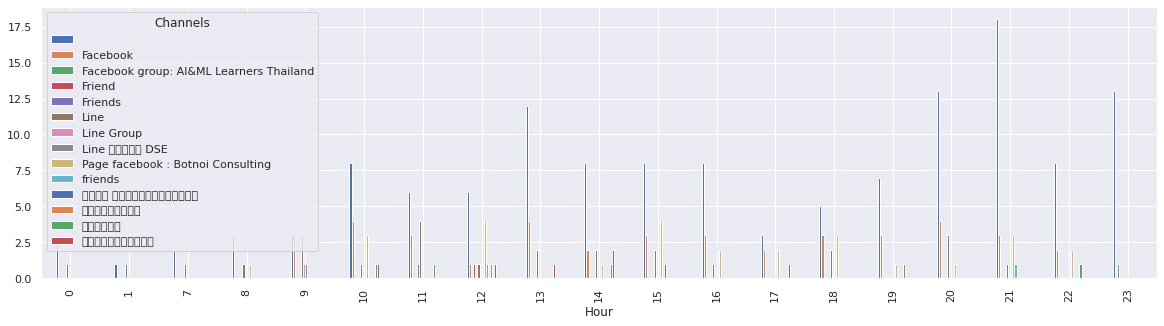

In [ ]:
# สร้างกราฟระหว่าง เวลาที่สมัคร กับ ช่องทางที่สมัคร
df_trans[['Date','Time']] = df_trans['Timestamp'].apply(lambda x: pd.Series(x.split(' ')))
df_trans['Hour'] = df_trans.Time.apply(lambda x: x.split(':')[0]).astype(int) 
df_trans['Channels'] = channel
Channel_Time = pd.crosstab(df_trans.Hour,df_trans.Channels, dropna=False)
Channel_Time.plot.bar(figsize=(20,5))

##คนที่อยากมาทำงานด้าน Data Sci

In [ ]:
df_trans['CarrierChange'].value_counts()

False    168
True      80
Name: CarrierChange, dtype: int64

       CarrierChange
False            168
True              80


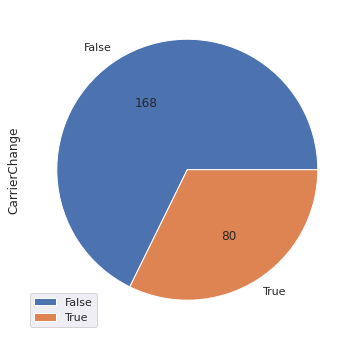

In [ ]:
CarrierChange = pd.DataFrame(df_trans['CarrierChange'].value_counts())
print(CarrierChange)

i = [0]

def absolute_value(val):
    a  = CarrierChange.iloc[i[0]%len(CarrierChange), i[0]//len(CarrierChange)]
    i[0] += 1
    return a

CarrierChange.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##กลุ่มไหนบ้างที่มีความสนใจอยากเปลี่ยนมาทำงานด้าน Data Sci

In [ ]:
df_trans['Gender'].value_counts()

Male      241
Female      7
Name: Gender, dtype: int64

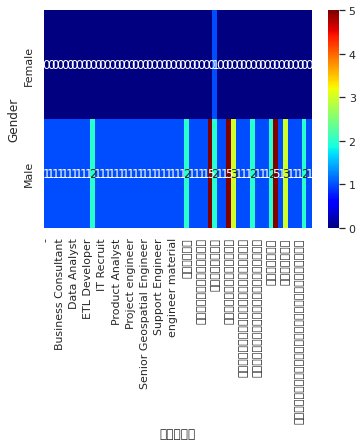

In [ ]:
# เทียบความสนใจในการเปลี่ยนสายงาน เทียบ กับเพศ
WorkCategories_CarrierChange = df_trans['อาชีพ'].loc[df_trans['CarrierChange']==True]
sns.heatmap(pd.crosstab(df_trans['Gender'],WorkCategories_CarrierChange, dropna=False), \
            annot=True, fmt="g", cmap='jet')

##Info ทำไมถึงสนใจสมัครเรียน

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
!gdown --id 1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF

Downloading...
From: https://drive.google.com/uc?id=1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF
To: /content/THSarabunNew Bold.ttf
100% 361k/361k [00:00<00:00, 46.3MB/s]


In [ ]:
textList = df_trans['ทำไมถึงสนใจสมัครเรียนคลาสนี้'].fillna('')

textList = ' '.join(textList)
textList

'อยากหาความรู้เพิ่มเอาไปประยุกต์กับงานหรือหางานใหม่ สนใจตำแหน่งงาน data engineer เพิ่มเติมความรู้ อยากมีความรู้ความเข้าใจกระบวนการทำ Data Engineer อยากเปลี่ยนสายงาน อยากหาความรู้ค่ะ เพื่อใช้ในการพัฒนางานที่ทำในปัจจุบัน ต้องการเพิ่ม skill อยากเก่ง ต้องการมีความรู้เพิ่มเพื่อที่สามารถนำไปประยุกต์ใช้กับงานปัจจุบัน หรือสามารถเปลี่ยนสายงานได้ในอนาคต นำความรู้มาใช้งานกับ Data Projects ต่างๆ ขององค์กร เพิ่มความรู้สำหรับใช้ในงาน น่าสนใจ อยากศึกษาการเป็น Data Engineer และ Data Scientist เอาไปใช้กับที่ทำงาน เพราะ Bundle ต้องการความรู้\u200bตั้งแต่พื้นฐาน\u200bโดยมีระบบ support อยากได้ความรู้เพิ่มเติม อยากมีความรู้เพิ่มเติมในด้านนี้ค่ะ สงสัยการนำdata ที่มีไปใช้ประโยชน์อย่างไรได้บ้าง ศึกษาความรู้เพิ่มเติมให้ทันต่อยุคสมัย อยากเปลี่ยนสายมาทาง DE หรือ Data Analyst ส่วนตัวก็กำลังหาความรู้เพิ่มเกี่ยวกับ data เเล้วไปอ่านบทความของ Data TH เรื่องของ data engineer ทำให้มีความสนใจทางด้านนี้มากขึ้น บวกกับเจอคอร์ดเรียนขึ้นมาพอดี ก็เลยสนใจที่จะสมัครครับ ต้องการทักษะด้าน data เพื่อใช้ในการเปลี่ยนสายงาน และใช้ควา

(-0.5, 1276.5, 749.5, -0.5)

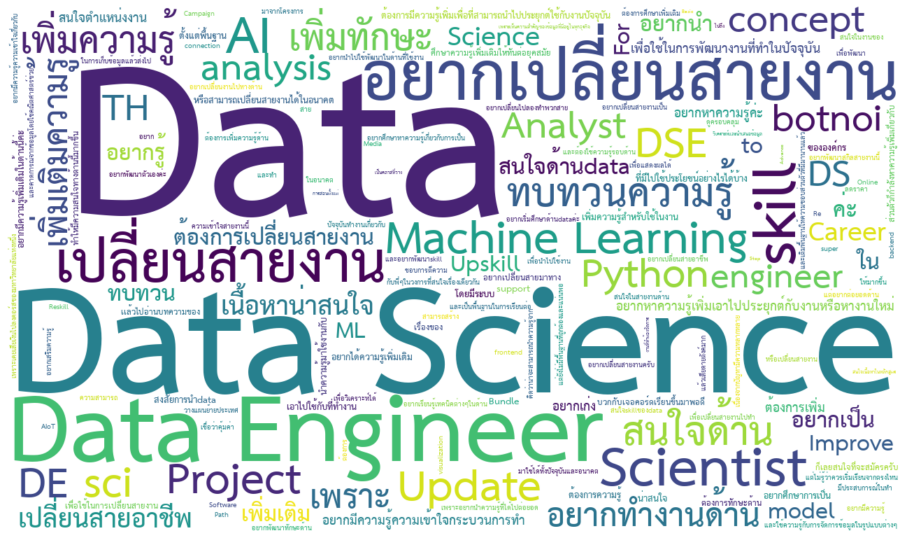

In [ ]:
path = '/content/THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย"]

wordcloud = WordCloud(font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=10,
                      background_color="white",
                      width=1277,
                      height=750,
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=stopwords,
                      random_state=1).generate(textList)
plt.figure(figsize = (16, 16))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")